# Проект для сервиса по подбору репетиторов Repetit.ru

## Описание проекта


Сервис Repetit.ru работает с большим количеством заявок от клиентов с данными о предмете, желаемой стоимости, возрасте ученика, целью занятий и тд. К сожалению, 7 из 8 не доходят до оплаты, при этом обработка заявки консультантом увеличивает конверсию в оплату на 30%. 
Проблема в том, что консультантов не хватает на все заявки и получается, что чем больше заявок — тем меньше конверсия из заявки в оплату и консультанты тратят время на бесперспективные заявки.

### Описание задачи

Разработать модель, которая по имеющейся информации о клиенте и заявке будет предсказывать вероятность оплаты заявки клиентом.

Заказчик хочет понять, какие заявки будут оплачены, а какие нет, чтобы одни обрабатывать вручную консультантами, а другие нет.  


# Критерии, которые важны заказчику:

- Оценка качества модели будет производиться с использованием precision и ROC-AUC.

###### Целевые метрики
- мы хотим получить результат, что 50-75% от общего объема заявок мы можем не обрабатывать, так как они не будут оплачены
- мы хотим видеть топ 5-25% заявок, которым нужно отдать максимальный приоритет
- мы толерантны к ошибке пресижн оплаченных заявок, то есть норм, если модель будет показывать больше заявок как хороших, чем на самом деле.
- мы не толерантны к низкому пресижн неоплаченных заявок, то есть не хотим модель, которая относит потенциально оплаченные заявки к плохим заявкам.


### Описание данных

Данные представленны в нескольких таблицах:

- Заявки (orders.feather)
- Репетиторы (teacher_info.feather)
- Подходящие по фильтру репетиторы (suitable_teachers.feather)
- Желаемые репетиторы (репетиторы, которых клиент выбрал клиент) (prefered_teachers_order_id.feather)

---

###### Заявки (orders.feather)
- order_date - дата создания 
- subject_id - предмет
- purpose - цель занятий
- lesson_price - цена
- lesson_duration - желаемая проодолжительность урока
- home_metro_id - ближайшее метро
- add_info - доп инфо
- start_date
- working_teacher_id
- status_id - оплачена ли заявка (значения 5, 6, 13 и 15 говорят о факте оплаты заявки)
- comments   
- amount_to_pay
- planned_lesson_number - клиент планирует N занятий
- first_lesson_date - дата 1 занятия
- coef - коэффициент
- creator_id - кто создал заявку (id сотрудника или клиента)
- pupil_category_new_id - возраст ученика
- lessons_per_week - занятий а неделю
- minimal_price
- teacher_sex - пол репетитора
- teacher_experience_from - опыт репетитора от
- teacher_experience_to- опыт репетитора до
- lesson_place_new - онлайн, у ученика, у учителя
- pupil_knowledgelvl -уровень знаний ученика
- teacher_age_from - желаемый возраст репеитора от
- teacher_age_to - желаемый возраст репеитора от
- chosen_teachers_only - не предлагать репетиторов кроме выбранных самостоятельно
- no_teachers_available - на заявку нет подходящих репов
- source_id - где создана заявка (какая часть сайта, не регион)
- original_order_id - дублем какой заявки является эта заявка
- client_id - айди клиента
- additional_status_id
- max_metro_distance - максимально готов ехать от метро
- estimated_fee 
- payment_date
- test_group - аб тесты
- is_display_to_teachers - хочет ли клиент получать отклики репетиторов

---

###### Репетиторы (teacher_info.feather)
- date_update
- reg_date
- birth_date
- teaching_start_date
- user_id - айди
- is_email_confirmed
- is_home_lessons
- is_external_lessons
- external_comments
- lesson_duration - продолжит урока
- lesson_cost - стоимость урока
- status_id
- status_relevant_date
- status_school_id
- status_college_id
- status_display
- russian_level_id
- home_country_id
- education
- information
- is_confirmed
- is_display - показывается в каталоге
- rating_id 
- rating - рейтинг
- comments
- rules_confirmed_date
- last_visited - послеждний визит
- is_pupils_needed - открыт для заявок
- is_cell_phone_confirmed
- effective_rating - какой-то еще рейтинг
- area_id
- registrar_id
- pupil_needed_date
- sex
- amount_to_pay - долг
- is_remote_lessons
- remote_comments
- show_on_map
- send_mailing
- send_suitable_orders
- rating_for_users - рейтинг 2
- rating_for_admin - рейтинг 3
- passport_id
- is_edited
- orders_allowed - разрешено назначать на заявки
- display_days
- verification_status_id
- is_individual
- partner_id
- star_rating - рейтинг 4
- rating_for_users_yesterday - рейтинг вчера
- review_num - отзывы
- relevance_date
- is_display_at_partners
- video_presentation_id - есть видеопрезентация
- status_institution_id
- Free_time_relevance_date

---

###### Подходящие по фильтру репетиторы (suitable_teachers.feather)
- tteacher_id - id репетитора
- order_id - id заявки
- contact_result    
- enable_auto_assign - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)
- enable_assign - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)

---

###### Желаемые репетиторы (prefered_teachers_order_id.feather)

- tteacher_id - id репетитора
- order_id - id заявки


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание задачи</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Бибилиотеки" data-toc-modified-id="Бибилиотеки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Бибилиотеки</a></span></li><li><span><a href="#Откроем-и-изучим-файлы" data-toc-modified-id="Откроем-и-изучим-файлы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Откроем и изучим файлы</a></span><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Функции</a></span></li></ul></li><li><span><a href="#Исследование-и-обработка-данных" data-toc-modified-id="Исследование-и-обработка-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование и обработка данных</a></span><ul class="toc-item"><li><span><a href="#Информация-о-заявках" data-toc-modified-id="Информация-о-заявках-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Информация о заявках</a></span></li><li><span><a href="#Таблица-orders" data-toc-modified-id="Таблица-orders-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Таблица orders</a></span><ul class="toc-item"><li><span><a href="#original_order_id" data-toc-modified-id="original_order_id-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>original_order_id</a></span></li><li><span><a href="#subject_id" data-toc-modified-id="subject_id-2.3.2.2"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>subject_id</a></span></li><li><span><a href="#lesson_price" data-toc-modified-id="lesson_price-2.3.2.3"><span class="toc-item-num">2.3.2.3&nbsp;&nbsp;</span>lesson_price</a></span></li><li><span><a href="#lesson_duration" data-toc-modified-id="lesson_duration-2.3.2.4"><span class="toc-item-num">2.3.2.4&nbsp;&nbsp;</span>lesson_duration</a></span></li><li><span><a href="#working_teacher_id" data-toc-modified-id="working_teacher_id-2.3.2.5"><span class="toc-item-num">2.3.2.5&nbsp;&nbsp;</span>working_teacher_id</a></span></li><li><span><a href="#amount_to_pay" data-toc-modified-id="amount_to_pay-2.3.2.6"><span class="toc-item-num">2.3.2.6&nbsp;&nbsp;</span>amount_to_pay</a></span></li><li><span><a href="#planned_lesson_number" data-toc-modified-id="planned_lesson_number-2.3.2.7"><span class="toc-item-num">2.3.2.7&nbsp;&nbsp;</span>planned_lesson_number</a></span></li><li><span><a href="#pupil_category_new_id" data-toc-modified-id="pupil_category_new_id-2.3.2.8"><span class="toc-item-num">2.3.2.8&nbsp;&nbsp;</span>pupil_category_new_id</a></span></li><li><span><a href="#lessons_per_week" data-toc-modified-id="lessons_per_week-2.3.2.9"><span class="toc-item-num">2.3.2.9&nbsp;&nbsp;</span>lessons_per_week</a></span></li><li><span><a href="#minimal_price" data-toc-modified-id="minimal_price-2.3.2.10"><span class="toc-item-num">2.3.2.10&nbsp;&nbsp;</span>minimal_price</a></span></li><li><span><a href="#teacher_sex" data-toc-modified-id="teacher_sex-2.3.2.11"><span class="toc-item-num">2.3.2.11&nbsp;&nbsp;</span>teacher_sex</a></span></li><li><span><a href="#teacher_experience" data-toc-modified-id="teacher_experience-2.3.2.12"><span class="toc-item-num">2.3.2.12&nbsp;&nbsp;</span>teacher_experience</a></span></li><li><span><a href="#lesson_place_new" data-toc-modified-id="lesson_place_new-2.3.2.13"><span class="toc-item-num">2.3.2.13&nbsp;&nbsp;</span>lesson_place_new</a></span></li><li><span><a href="#pupil_knowledgelvl" data-toc-modified-id="pupil_knowledgelvl-2.3.2.14"><span class="toc-item-num">2.3.2.14&nbsp;&nbsp;</span>pupil_knowledgelvl</a></span></li><li><span><a href="#teacher_age" data-toc-modified-id="teacher_age-2.3.2.15"><span class="toc-item-num">2.3.2.15&nbsp;&nbsp;</span>teacher_age</a></span></li><li><span><a href="#chosen_teachers_only" data-toc-modified-id="chosen_teachers_only-2.3.2.16"><span class="toc-item-num">2.3.2.16&nbsp;&nbsp;</span>chosen_teachers_only</a></span></li><li><span><a href="#no_teachers_available" data-toc-modified-id="no_teachers_available-2.3.2.17"><span class="toc-item-num">2.3.2.17&nbsp;&nbsp;</span>no_teachers_available</a></span></li><li><span><a href="#source_id" data-toc-modified-id="source_id-2.3.2.18"><span class="toc-item-num">2.3.2.18&nbsp;&nbsp;</span>source_id</a></span></li><li><span><a href="#client_id" data-toc-modified-id="client_id-2.3.2.19"><span class="toc-item-num">2.3.2.19&nbsp;&nbsp;</span>client_id</a></span></li><li><span><a href="#is_display_to_teachers" data-toc-modified-id="is_display_to_teachers-2.3.2.20"><span class="toc-item-num">2.3.2.20&nbsp;&nbsp;</span>is_display_to_teachers</a></span></li><li><span><a href="#Резервный-файл" data-toc-modified-id="Резервный-файл-2.3.2.21"><span class="toc-item-num">2.3.2.21&nbsp;&nbsp;</span>Резервный файл</a></span></li><li><span><a href="#status_id" data-toc-modified-id="status_id-2.3.2.22"><span class="toc-item-num">2.3.2.22&nbsp;&nbsp;</span>status_id</a></span></li><li><span><a href="#Обработка-бинарных-столбцов" data-toc-modified-id="Обработка-бинарных-столбцов-2.3.2.23"><span class="toc-item-num">2.3.2.23&nbsp;&nbsp;</span>Обработка бинарных столбцов</a></span></li><li><span><a href="#Оценка-дисбаланса-целевого-признака" data-toc-modified-id="Оценка-дисбаланса-целевого-признака-2.3.2.24"><span class="toc-item-num">2.3.2.24&nbsp;&nbsp;</span>Оценка дисбаланса целевого признака</a></span></li><li><span><a href="#Вывод-по-итогу-исследования-данных-в-таблице-orders" data-toc-modified-id="Вывод-по-итогу-исследования-данных-в-таблице-orders-2.3.2.25"><span class="toc-item-num">2.3.2.25&nbsp;&nbsp;</span>Вывод по итогу исследования данных в таблице orders</a></span></li><li><span><a href="#Резервный-файл-orders" data-toc-modified-id="Резервный-файл-orders-2.3.2.26"><span class="toc-item-num">2.3.2.26&nbsp;&nbsp;</span>Резервный файл orders</a></span></li></ul></li><li><span><a href="#Информация-об-учителях" data-toc-modified-id="Информация-об-учителях-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Информация об учителях</a></span><ul class="toc-item"><li><span><a href="#Дублируемые-столбцы" data-toc-modified-id="Дублируемые-столбцы-2.3.3.1"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Дублируемые столбцы</a></span></li><li><span><a href="#date_update" data-toc-modified-id="date_update-2.3.3.2"><span class="toc-item-num">2.3.3.2&nbsp;&nbsp;</span>date_update</a></span></li><li><span><a href="#reg_date" data-toc-modified-id="reg_date-2.3.3.3"><span class="toc-item-num">2.3.3.3&nbsp;&nbsp;</span>reg_date</a></span></li><li><span><a href="#birth_date" data-toc-modified-id="birth_date-2.3.3.4"><span class="toc-item-num">2.3.3.4&nbsp;&nbsp;</span>birth_date</a></span></li><li><span><a href="#teaching_start_date" data-toc-modified-id="teaching_start_date-2.3.3.5"><span class="toc-item-num">2.3.3.5&nbsp;&nbsp;</span>teaching_start_date</a></span></li><li><span><a href="#is_email_confirmed" data-toc-modified-id="is_email_confirmed-2.3.3.6"><span class="toc-item-num">2.3.3.6&nbsp;&nbsp;</span>is_email_confirmed</a></span></li><li><span><a href="#is_home_lessons" data-toc-modified-id="is_home_lessons-2.3.3.7"><span class="toc-item-num">2.3.3.7&nbsp;&nbsp;</span>is_home_lessons</a></span></li><li><span><a href="#is_external_lessons" data-toc-modified-id="is_external_lessons-2.3.3.8"><span class="toc-item-num">2.3.3.8&nbsp;&nbsp;</span>is_external_lessons</a></span></li><li><span><a href="#lesson_duration" data-toc-modified-id="lesson_duration-2.3.3.9"><span class="toc-item-num">2.3.3.9&nbsp;&nbsp;</span>lesson_duration</a></span></li><li><span><a href="#lesson_cost" data-toc-modified-id="lesson_cost-2.3.3.10"><span class="toc-item-num">2.3.3.10&nbsp;&nbsp;</span>lesson_cost</a></span></li><li><span><a href="#status_id" data-toc-modified-id="status_id-2.3.3.11"><span class="toc-item-num">2.3.3.11&nbsp;&nbsp;</span>status_id</a></span></li><li><span><a href="#status_display" data-toc-modified-id="status_display-2.3.3.12"><span class="toc-item-num">2.3.3.12&nbsp;&nbsp;</span>status_display</a></span></li><li><span><a href="#russian_level_id" data-toc-modified-id="russian_level_id-2.3.3.13"><span class="toc-item-num">2.3.3.13&nbsp;&nbsp;</span>russian_level_id</a></span></li><li><span><a href="#home_country_id" data-toc-modified-id="home_country_id-2.3.3.14"><span class="toc-item-num">2.3.3.14&nbsp;&nbsp;</span>home_country_id</a></span></li><li><span><a href="#information" data-toc-modified-id="information-2.3.3.15"><span class="toc-item-num">2.3.3.15&nbsp;&nbsp;</span>information</a></span></li><li><span><a href="#is_confirmed" data-toc-modified-id="is_confirmed-2.3.3.16"><span class="toc-item-num">2.3.3.16&nbsp;&nbsp;</span>is_confirmed</a></span></li><li><span><a href="#photo_path" data-toc-modified-id="photo_path-2.3.3.17"><span class="toc-item-num">2.3.3.17&nbsp;&nbsp;</span>photo_path</a></span></li><li><span><a href="#is_display" data-toc-modified-id="is_display-2.3.3.18"><span class="toc-item-num">2.3.3.18&nbsp;&nbsp;</span>is_display</a></span></li><li><span><a href="#rating_id" data-toc-modified-id="rating_id-2.3.3.19"><span class="toc-item-num">2.3.3.19&nbsp;&nbsp;</span>rating_id</a></span></li><li><span><a href="#rating" data-toc-modified-id="rating-2.3.3.20"><span class="toc-item-num">2.3.3.20&nbsp;&nbsp;</span>rating</a></span></li><li><span><a href="#rules_confirmed_date" data-toc-modified-id="rules_confirmed_date-2.3.3.21"><span class="toc-item-num">2.3.3.21&nbsp;&nbsp;</span>rules_confirmed_date</a></span></li><li><span><a href="#last_visited" data-toc-modified-id="last_visited-2.3.3.22"><span class="toc-item-num">2.3.3.22&nbsp;&nbsp;</span>last_visited</a></span></li><li><span><a href="#is_cell_phone_confirmed" data-toc-modified-id="is_cell_phone_confirmed-2.3.3.23"><span class="toc-item-num">2.3.3.23&nbsp;&nbsp;</span>is_cell_phone_confirmed</a></span></li><li><span><a href="#effective_rating" data-toc-modified-id="effective_rating-2.3.3.24"><span class="toc-item-num">2.3.3.24&nbsp;&nbsp;</span>effective_rating</a></span></li><li><span><a href="#area_id" data-toc-modified-id="area_id-2.3.3.25"><span class="toc-item-num">2.3.3.25&nbsp;&nbsp;</span>area_id</a></span></li><li><span><a href="#sex" data-toc-modified-id="sex-2.3.3.26"><span class="toc-item-num">2.3.3.26&nbsp;&nbsp;</span>sex</a></span></li><li><span><a href="#amount_to_pay" data-toc-modified-id="amount_to_pay-2.3.3.27"><span class="toc-item-num">2.3.3.27&nbsp;&nbsp;</span>amount_to_pay</a></span></li><li><span><a href="#is_remote_lessons" data-toc-modified-id="is_remote_lessons-2.3.3.28"><span class="toc-item-num">2.3.3.28&nbsp;&nbsp;</span>is_remote_lessons</a></span></li><li><span><a href="#show_on_map" data-toc-modified-id="show_on_map-2.3.3.29"><span class="toc-item-num">2.3.3.29&nbsp;&nbsp;</span>show_on_map</a></span></li><li><span><a href="#send_mailing" data-toc-modified-id="send_mailing-2.3.3.30"><span class="toc-item-num">2.3.3.30&nbsp;&nbsp;</span>send_mailing</a></span></li><li><span><a href="#send_suitable_orders" data-toc-modified-id="send_suitable_orders-2.3.3.31"><span class="toc-item-num">2.3.3.31&nbsp;&nbsp;</span>send_suitable_orders</a></span></li><li><span><a href="#rating_for_users" data-toc-modified-id="rating_for_users-2.3.3.32"><span class="toc-item-num">2.3.3.32&nbsp;&nbsp;</span>rating_for_users</a></span></li><li><span><a href="#rating_for_admin" data-toc-modified-id="rating_for_admin-2.3.3.33"><span class="toc-item-num">2.3.3.33&nbsp;&nbsp;</span>rating_for_admin</a></span></li><li><span><a href="#is_edited" data-toc-modified-id="is_edited-2.3.3.34"><span class="toc-item-num">2.3.3.34&nbsp;&nbsp;</span>is_edited</a></span></li><li><span><a href="#orders_allowed" data-toc-modified-id="orders_allowed-2.3.3.35"><span class="toc-item-num">2.3.3.35&nbsp;&nbsp;</span>orders_allowed</a></span></li><li><span><a href="#display_days" data-toc-modified-id="display_days-2.3.3.36"><span class="toc-item-num">2.3.3.36&nbsp;&nbsp;</span>display_days</a></span></li><li><span><a href="#verification_status_id" data-toc-modified-id="verification_status_id-2.3.3.37"><span class="toc-item-num">2.3.3.37&nbsp;&nbsp;</span>verification_status_id</a></span></li><li><span><a href="#star_rating" data-toc-modified-id="star_rating-2.3.3.38"><span class="toc-item-num">2.3.3.38&nbsp;&nbsp;</span>star_rating</a></span></li><li><span><a href="#rating_for_users_yesterday" data-toc-modified-id="rating_for_users_yesterday-2.3.3.39"><span class="toc-item-num">2.3.3.39&nbsp;&nbsp;</span>rating_for_users_yesterday</a></span></li><li><span><a href="#review_num" data-toc-modified-id="review_num-2.3.3.40"><span class="toc-item-num">2.3.3.40&nbsp;&nbsp;</span>review_num</a></span></li><li><span><a href="#relevance_date" data-toc-modified-id="relevance_date-2.3.3.41"><span class="toc-item-num">2.3.3.41&nbsp;&nbsp;</span>relevance_date</a></span></li><li><span><a href="#is_display_at_partners" data-toc-modified-id="is_display_at_partners-2.3.3.42"><span class="toc-item-num">2.3.3.42&nbsp;&nbsp;</span>is_display_at_partners</a></span></li><li><span><a href="#Вывод-по-итогу-исследования-данных-в-таблице-teachers_info" data-toc-modified-id="Вывод-по-итогу-исследования-данных-в-таблице-teachers_info-2.3.3.43"><span class="toc-item-num">2.3.3.43&nbsp;&nbsp;</span>Вывод по итогу исследования данных в таблице teachers_info</a></span></li><li><span><a href="#Резервный-файл-teachers_info" data-toc-modified-id="Резервный-файл-teachers_info-2.3.3.44"><span class="toc-item-num">2.3.3.44&nbsp;&nbsp;</span>Резервный файл teachers_info</a></span></li><li><span><a href="#Обработка-бинарных-столбцов" data-toc-modified-id="Обработка-бинарных-столбцов-2.3.3.45"><span class="toc-item-num">2.3.3.45&nbsp;&nbsp;</span>Обработка бинарных столбцов</a></span></li><li><span><a href="#Обработка-текстовых-бинарных-столбцов" data-toc-modified-id="Обработка-текстовых-бинарных-столбцов-2.3.3.46"><span class="toc-item-num">2.3.3.46&nbsp;&nbsp;</span>Обработка текстовых бинарных столбцов</a></span></li><li><span><a href="#Резервный-файл-teachers_info" data-toc-modified-id="Резервный-файл-teachers_info-2.3.3.47"><span class="toc-item-num">2.3.3.47&nbsp;&nbsp;</span>Резервный файл teachers_info</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Подготовка-итоговой-таблицы" data-toc-modified-id="Подготовка-итоговой-таблицы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка итоговой таблицы</a></span><ul class="toc-item"><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Очистка-данных" data-toc-modified-id="Очистка-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Очистка данных</a></span></li></ul></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных" data-toc-modified-id="Разбиение-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разбиение данных</a></span></li><li><span><a href="#Масштабирование-и-кодирование-признаков" data-toc-modified-id="Масштабирование-и-кодирование-признаков-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Масштабирование и кодирование признаков</a></span></li><li><span><a href="#Вывод-по-итогу-подготовки-данных-для-обучения" data-toc-modified-id="Вывод-по-итогу-подготовки-данных-для-обучения-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод по итогу подготовки данных для обучения</a></span></li></ul></li><li><span><a href="#Обучение-и-выбор-модели" data-toc-modified-id="Обучение-и-выбор-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение и выбор модели</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Вывод-по-итогу-обучения-моделей" data-toc-modified-id="Вывод-по-итогу-обучения-моделей-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Вывод по итогу обучения моделей</a></span></li></ul></li><li><span><a href="#Оценка-лучшей-модели" data-toc-modified-id="Оценка-лучшей-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Оценка лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Матрица-ошибок" data-toc-modified-id="Матрица-ошибок-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Матрица ошибок</a></span></li><li><span><a href="#Оценка-важности-признаков" data-toc-modified-id="Оценка-важности-признаков-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Оценка важности признаков</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Итоговый вывод</a></span><ul class="toc-item"><li><span><a href="#Возможные-улучшения-проекта" data-toc-modified-id="Возможные-улучшения-проекта-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Возможные улучшения проекта</a></span></li></ul></li></ul></div>

## Загрузка и ознакомление с данными

### Бибилиотеки

In [1]:
# подготавливаем рабочее пространство
# загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
from functools import partial
import phik

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import make_pipeline
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV #, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, make_scorer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report

import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [4]:
pd.set_option('display.max_columns', None)

### Откроем и изучим файлы

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
%%time

try:
    df_orders = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/orders.feather')
    df_teachers_info = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/teachers_info.feather')
    df_suitable_teachers = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/suitable_teachers.feather')
    df_prefered_teachers = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/prefered_teachers_order_id.feather')
except:
    print('except')

CPU times: user 5.68 s, sys: 4.85 s, total: 10.5 s
Wall time: 8.65 s


#### Функции

In [7]:
# функция для замены нулевых значений дубликатов из оригинала
def fix(row, col):
    if row[col]==0 and row['original_order_id']!=0:
        # извлечем id оригинальной заявки
        orig_id = row['original_order_id']
        # извлечем значение для заполнения
        new = df_orders.loc[df_orders.id == orig_id, col]
        # запишем новое значение
        try:
#             print(new.values[0])
            return new.values[0]
        except:
            pass
#     print(row[col])
    return row[col]

In [8]:
# функция для замены ненулевых значений на 1
def change(row, col):
    if row[col]!=0:
        return 1
    return 0

In [9]:
# функция для замены ненулевых значений на 1 для текстовых столбцов
def change_text(row, col):
    if type(row[col]) == float:
        return 0
    return 1

In [10]:
def binar_total(row):
    return int(sum(row[binar_cols]))

### Исследование и обработка данных

#### Информация о заявках

In [11]:
display(df_orders.head(3).style.set_caption('Информация о заявках'))
print(f"Количество явных дубликатов: {df_orders.duplicated().sum()}\n")
df_orders.info()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.000000,None,0,60,None,nan,None,None,nan,16,None,nan,0,0,None,nan,nan,0,0,3,0,0,0,0,0,0,0,0,18,2294000.000000,675960,7.000000,nan,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.000000,None,0,60,None,nan,None,None,nan,7,"01.11.2022 11:46 - ""Заявка прикреплена к заявке № 2294000"" (Алешина Марина)",nan,0,0,None,nan,nan,0,0,3,0,0,0,0,0,0,0,0,18,2294000.000000,675960,7.000000,nan,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.000000,Разделы: начертательная геометрия. Категория ученика: студентка 1 курса. Цель занятий: помощь по программе.,800,60,None,nan,"Место проведения занятий: дистанционно (например, Skype). Время МСК. Предполагаемое число занятий в неделю: 1, будни и суббота после 17, воскресенье в течение дня.",2022-11-01 10:37:02.567,143480.000000,16,None,nan,0,7,None,nan,14.000000,2,0,3,0,0,4,0,0,0,0,0,23,nan,1024439,10.000000,nan,1200,None,1


Количество явных дубликатов: 900

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_

Сразу избавимся от неинформативных столбцов и столбцов, которые не будем использовать.

In [12]:
drop_cols = ['order_date', 'home_metro_id', 'max_metro_distance',
             'comments', 'creator_id', 'purpose', 'add_info', 
             'start_date', 'comments', 'estimated_fee', 'first_lesson_date', 'lesson_place',
             'prefered_teacher_id', 'payment_date', 'additional_status_id'
#              'working_teacher_id', 
            ]
df_orders = df_orders.drop(drop_cols, axis=1)

In [13]:
del drop_cols

In [14]:
round(df_orders.isna().sum() / len(df_orders) * 100, 2)

id                          0.00
subject_id                  0.87
lesson_price                0.00
lesson_duration             0.00
working_teacher_id         40.77
status_id                   0.00
amount_to_pay               0.00
planned_lesson_number       0.00
pupil_category_new_id      13.37
lessons_per_week            0.00
minimal_price               0.00
teacher_sex                 0.00
teacher_experience_from     0.00
teacher_experience_to       0.00
lesson_place_new            0.00
pupil_knowledgelvl          0.00
teacher_age_from            0.00
teacher_age_to              0.00
chosen_teachers_only        0.00
no_teachers_available       0.00
source_id                   0.00
original_order_id          51.12
client_id                   0.00
is_display_to_teachers      0.00
dtype: float64

#### Таблица orders

##### original_order_id

Для обработки последующих признаков необходимо обработать данный столбец.

In [15]:
df_orders.original_order_id = df_orders.original_order_id.fillna(0)
df_orders.original_order_id = df_orders.original_order_id.astype('int')

Поскольку данный столбец в будущем будет удалён, примем фиксирующее значение 0 для последующих преобразований.

##### subject_id

In [16]:
df_orders = df_orders.dropna(subset=['subject_id'])
df_orders.subject_id.unique()

array([1.000000e+00, 2.100000e+01, 8.000000e+00, 3.000000e+00,
       9.000000e+00, 3.300000e+01, 5.000000e+00, 2.000000e+00,
       1.800000e+01, 2.700000e+01, 1.000000e+01, 1.500000e+01,
       1.100000e+01, 6.000000e+00, 1.300000e+01, 1.400000e+01,
       1.200000e+01, 3.600000e+01, 1.900000e+01, 1.700000e+01,
       7.000000e+00, 2.000000e+01, 2.500000e+01, 4.000000e+00,
       2.900000e+01, 2.300000e+01, 1.600000e+01, 3.211265e+06,
       3.342337e+06, 3.605505e+06], dtype=float32)

In [17]:
print(f'Количество выбивающихся значений: {sum(df_orders.subject_id > 1000)}')

Количество выбивающихся значений: 4


In [18]:
df_orders = df_orders.loc[df_orders.subject_id < 1000]

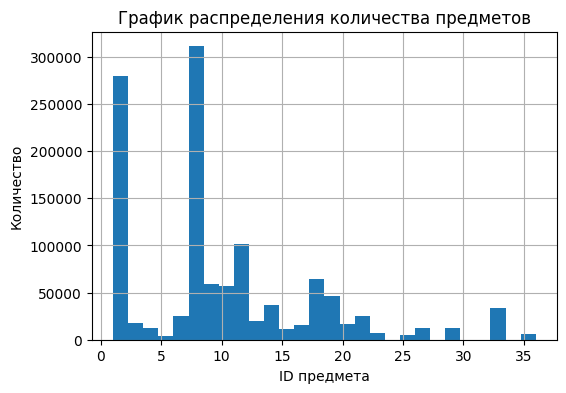

In [19]:
df_orders.subject_id.hist(bins=len(df_orders.subject_id.unique())+1, figsize=(6,4))
plt.title('График распределения количества предметов')
plt.ylabel('Количество')
plt.xlabel('ID предмета')
plt.show()

В столбце предметов имелось незначительное количество пропусков, а также выбивающиеся значенияБ которые следует удалить.

##### lesson_price

In [20]:
display(sorted(df_orders.lesson_price.unique())[:10])
display(sorted(df_orders.lesson_price.unique())[-10:])

[0, 1, 2, 3, 4, 5, 10, 11, 12, 15]

[600000,
 700000,
 800000,
 1000000,
 7500095,
 7777777,
 10000000,
 10090000,
 20000000,
 1000000000]

Обратим внимание, в каких строках пропущены значения, видна закономерность дубликатов. Заполним нули, значениями из оригинальных заявок.

In [21]:
df_orders.loc[(df_orders['lesson_price']<25)&(df_orders['original_order_id']==0)]

,id,subject_id,lesson_price,lesson_duration,working_teacher_id,status_id,amount_to_pay,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,is_display_to_teachers
4,2294058,8.0,0,60,NaN,16,0,0,NaN,0,0,0,0,0,2,0,0,0,0,0,16,0,1024440,1
5,2294059,3.0,0,60,NaN,16,0,0,NaN,0,0,3,0,0,0,0,0,0,0,0,16,0,1024441,1
10,2294064,33.0,0,60,NaN,16,0,0,NaN,0,0,3,0,0,0,0,0,0,0,0,16,0,1024442,1
26,2294080,8.0,0,60,NaN,16,0,10,9.0,3,0,3,5,0,1,0,16,40,0,0,23,0,1024451,1
30,2294084,18.0,0,60,NaN,16,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,16,0,1024453,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437148,2280439,10.0,0,60,NaN,16,0,10,9.0,3,0,2,0,0,2,0,16,90,0,0,23,0,1019603,1
437168,2280459,8.0,0,60,NaN,16,0,2,8.0,4,0,3,0,0,1,0,21,90,0,0,23,0,1019611,1
437171,2280462,11.0,0,60,NaN,16,0,0,11.0,3,0,3,0,0,2,0,0,0,0,0,16,0,1019613,1
437197,2280488,19.0,0,60,NaN,7,0,0,NaN,0,0,3,0,0,0,0,0,0,0,0,16,0,1019624,1


In [22]:
%%time
lesson_price_fix = partial(fix, col='lesson_price')
df_orders['lesson_price'] = df_orders.apply(lesson_price_fix, axis=1)

CPU times: user 1min 10s, sys: 490 ms, total: 1min 11s
Wall time: 1min 11s


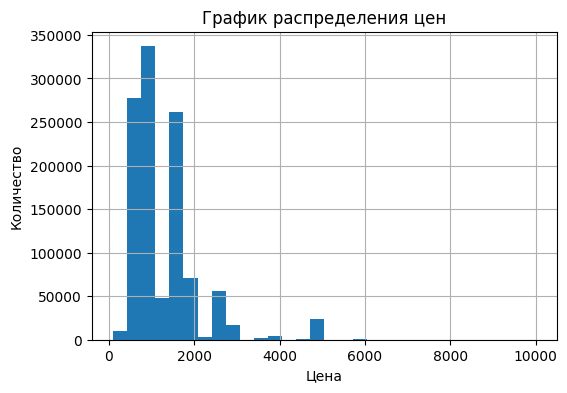

In [23]:
df_orders.lesson_price.hist(figsize=(6,4), range=(100, 10001), bins=30)

plt.title('График распределения цен')
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.show()

In [24]:
df_orders = df_orders.loc[(df_orders.lesson_price >= 200) & (df_orders.lesson_price <= 10000)]

##### lesson_duration

In [25]:
print(f'Уникальные значения столбца lesson_duration: {sorted(df_orders.lesson_duration.unique())}')

Уникальные значения столбца lesson_duration: [0, 45, 60, 90, 120, 135]


In [26]:
count_fix = len(df_orders.query("lesson_duration == 0 & original_order_id != 0"))
print(f'Потенциально можно заполнить нулей: {count_fix}')

Потенциально можно заполнить нулей: 760


In [27]:
%%time
lesson_duration_fix = partial(fix, col='lesson_duration')
df_orders['lesson_duration'] = df_orders.apply(lesson_duration_fix, axis=1)

CPU times: user 11.5 s, sys: 383 ms, total: 11.9 s
Wall time: 11.9 s


In [28]:
df_orders = df_orders.loc[df_orders.lesson_duration != 0]

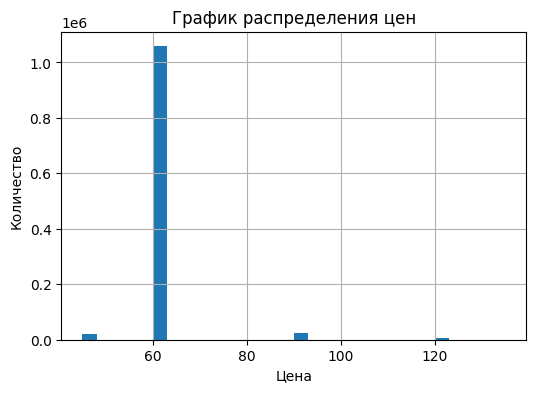

In [29]:
df_orders.lesson_duration.hist(figsize=(6,4), bins=30)

plt.title('График распределения цен')
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.show()

##### working_teacher_id

В последующем этот столбец используем для объединения с информацией об учителях. 

In [30]:
display(sorted(df_orders.working_teacher_id.unique())[:10])
sorted(df_orders.working_teacher_id.unique())[-10:]

[nan, 33.0, 51.0, 86.0, 87.0, 96.0, 106.0, 109.0, 112.0, 114.0]

[312047.0,
 312065.0,
 312070.0,
 312075.0,
 312076.0,
 312087.0,
 312147.0,
 312200.0,
 312244.0,
 312304.0]

In [31]:
df_orders.head(3)

,id,subject_id,lesson_price,lesson_duration,working_teacher_id,status_id,amount_to_pay,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,is_display_to_teachers
0,2294054,1.0,3000,60,NaN,16,0,0,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000,675960,1
1,2294055,1.0,3000,60,NaN,7,0,0,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000,675960,1
2,2294056,21.0,800,60,143480.0,16,0,7,14.0,2,0,3,0,0,4,0,0,0,0,0,23,0,1024439,1


Из таблицы видно, что ситуация с пропусками схожая. Их можно заменить из оргиналов заявок.

In [32]:
df_orders.working_teacher_id = df_orders.working_teacher_id.fillna(0)
df_orders.working_teacher_id = df_orders.working_teacher_id.astype('int')

In [33]:
count_fix = len(df_orders.query("working_teacher_id==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("working_teacher_id==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 406955
Потенциально можно заполнить нулей: 257866


In [34]:
%%time
working_teacher_id_fix = partial(fix, col='working_teacher_id')
df_orders['working_teacher_id'] = df_orders.apply(working_teacher_id_fix, axis=1)

CPU times: user 2min 15s, sys: 518 ms, total: 2min 15s
Wall time: 2min 15s


In [35]:
df_orders = df_orders.loc[df_orders.working_teacher_id != 0]

##### amount_to_pay

In [36]:
df_orders.amount_to_pay.unique()

array(['0', '2100', '875', ..., '2958', '249,75', '9500'], dtype=object)

В столбце присутствуют значения, написанные через запятую. Заменим их и поставит признаку нужный формат

In [37]:
df_orders['amount_to_pay'] = [x.replace(',', '.') for x in df_orders['amount_to_pay']]

In [38]:
df_orders.amount_to_pay = df_orders.amount_to_pay.astype('float')

In [39]:
count_fix = len(df_orders.query("amount_to_pay==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("amount_to_pay==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 754482
Потенциально можно заполнить нулей: 451170


В столбце присутствует бошое количество нулей, которые нельз заменить. Сформируем из этого столбца новый с фактом наличия значения в `amount_to_pay`

In [40]:
%%time
amount_to_pay_change = partial(change, col='amount_to_pay')
df_orders['amount_to_pay'] = df_orders.apply(amount_to_pay_change, axis=1)

CPU times: user 5.94 s, sys: 88 ms, total: 6.03 s
Wall time: 6.03 s


In [41]:
%%time
amount_to_pay_fix = partial(fix, col='amount_to_pay')
df_orders['amount_to_pay'] = df_orders.apply(amount_to_pay_fix, axis=1)

CPU times: user 4min 58s, sys: 189 ms, total: 4min 58s
Wall time: 4min 58s


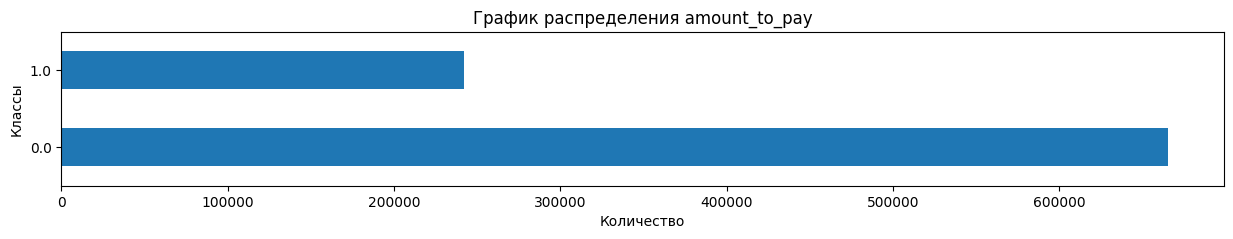

Распределение признака по классам в процентах


0.0    73.321952
1.0    26.678048
Name: amount_to_pay, dtype: float64

In [42]:
df_orders.amount_to_pay.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения amount_to_pay')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['amount_to_pay'].value_counts(normalize=True)*100

##### planned_lesson_number

In [43]:
print(f'Уникальные значения столбца planned_lesson_number: {sorted(df_orders.planned_lesson_number.unique())}')

Уникальные значения столбца planned_lesson_number: [0, 1, 2, 7, 10]


In [44]:
count_fix = len(df_orders.query("planned_lesson_number==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("planned_lesson_number==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 78942
Потенциально можно заполнить нулей: 78769


In [45]:
%%time
planned_lesson_number_fix = partial(fix, col='planned_lesson_number')
df_orders['planned_lesson_number'] = df_orders.apply(planned_lesson_number_fix, axis=1)

CPU times: user 59.8 s, sys: 168 ms, total: 1min
Wall time: 60 s


In [46]:
df_orders = df_orders.loc[df_orders.planned_lesson_number != 0]

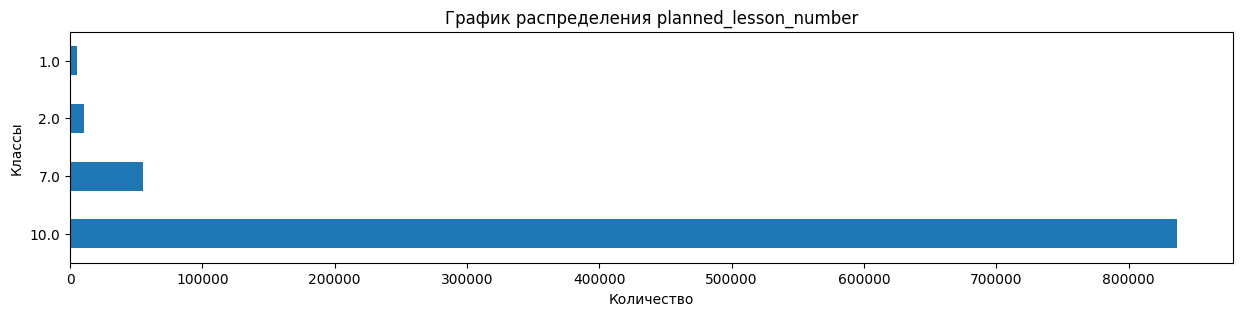

Распределение признака по классам в процентах


10.0    92.193142
7.0      6.081024
2.0      1.165321
1.0      0.560513
Name: planned_lesson_number, dtype: float64

In [47]:
df_orders.planned_lesson_number.value_counts().plot.barh(figsize=(15, 3))
plt.title('График распределения planned_lesson_number')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['planned_lesson_number'].value_counts(normalize=True)*100

##### pupil_category_new_id

In [48]:
df_orders.pupil_category_new_id = df_orders.pupil_category_new_id.fillna(0)
df_orders.pupil_category_new_id = df_orders.pupil_category_new_id.astype('int')

In [49]:
count_fix = len(df_orders.query("pupil_category_new_id==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("pupil_category_new_id==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 77493
Потенциально можно заполнить нулей: 76307


In [50]:
%%time
pupil_category_new_id_fix = partial(fix, col='pupil_category_new_id')
df_orders['pupil_category_new_id'] = df_orders.apply(pupil_category_new_id_fix, axis=1)

CPU times: user 58.5 s, sys: 152 ms, total: 58.6 s
Wall time: 58.6 s


In [51]:
df_orders = df_orders.loc[df_orders.pupil_category_new_id != 0]

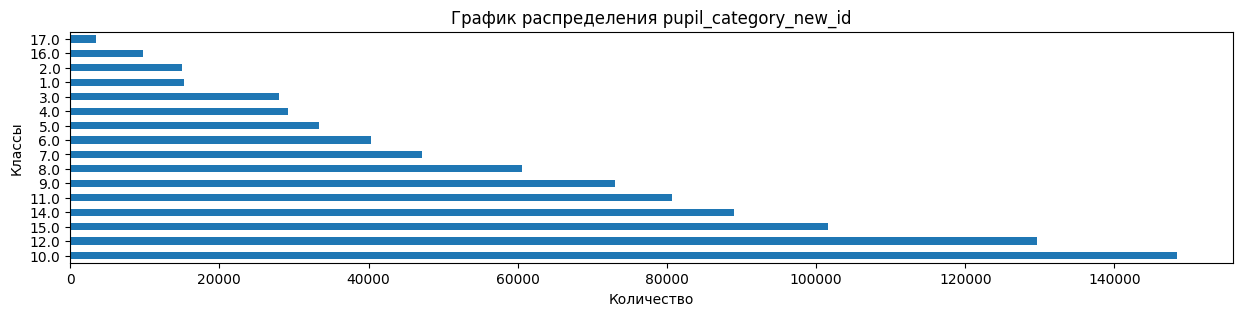

Распределение признака по классам в процентах


10.0    16.405360
12.0    14.327983
15.0    11.226232
14.0     9.843967
11.0     8.918184
9.0      8.076733
8.0      6.701321
7.0      5.211402
6.0      4.463568
5.0      3.693298
4.0      3.220679
3.0      3.088930
1.0      1.693291
2.0      1.660575
16.0     1.081960
17.0     0.386517
Name: pupil_category_new_id, dtype: float64

In [52]:
df_orders.pupil_category_new_id.value_counts().plot.barh(figsize=(15, 3))
plt.title('График распределения pupil_category_new_id')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['pupil_category_new_id'].value_counts(normalize=True)*100

##### lessons_per_week

In [53]:
print(f'Уникальные значения столбца lessons_per_week: {sorted(df_orders.lessons_per_week.unique())}')

Уникальные значения столбца lessons_per_week: [0, 1, 2, 3, 4, 5, 6, 7]


In [54]:
count_fix = len(df_orders.query("lessons_per_week==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("lessons_per_week==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 83842
Потенциально можно заполнить нулей: 81168


In [55]:
%%time
lessons_per_week_fix = partial(fix, col='lessons_per_week')
df_orders['lessons_per_week'] = df_orders.apply(lessons_per_week_fix, axis=1)

CPU times: user 1min 1s, sys: 136 ms, total: 1min 2s
Wall time: 1min 2s


In [56]:
df_orders = df_orders.loc[df_orders.lessons_per_week != 0]

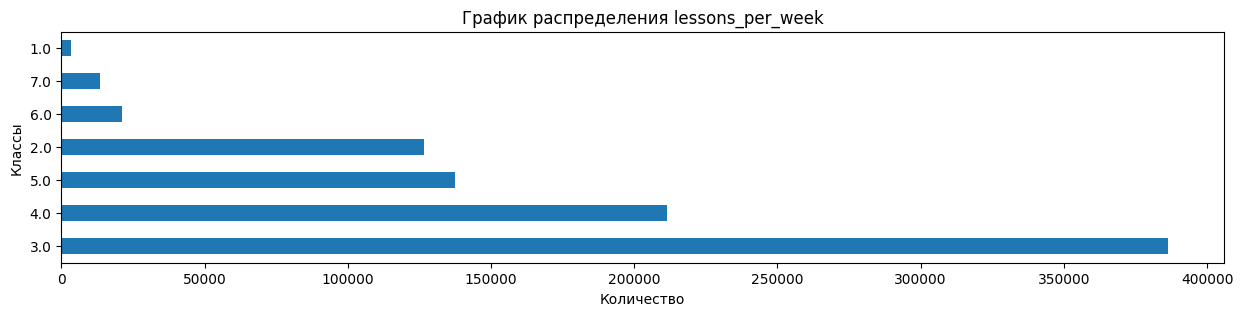

Распределение признака по классам в процентах


3.0    42.943966
4.0    23.499596
5.0    15.257038
2.0    14.068514
6.0     2.354826
7.0     1.500516
1.0     0.375546
Name: lessons_per_week, dtype: float64

In [57]:
df_orders.lessons_per_week.value_counts().plot.barh(figsize=(15, 3))
plt.title('График распределения lessons_per_week')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['lessons_per_week'].value_counts(normalize=True)*100

##### minimal_price

In [58]:
count_fix = len(df_orders.query("minimal_price==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("minimal_price==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 638765
Потенциально можно заполнить нулей: 367381


Поскольку преимущественное количество значений - нули, поступим, как с `amount_to_pay`. Заменим заявки с наличием признака на `1`

In [59]:
%%time
minimal_price_change = partial(change, col='minimal_price')
df_orders['minimal_price'] = df_orders.apply(minimal_price_change, axis=1)

CPU times: user 5.82 s, sys: 84 ms, total: 5.9 s
Wall time: 5.9 s


In [60]:
%%time
minimal_price_fix = partial(fix, col='minimal_price')
df_orders['minimal_price'] = df_orders.apply(minimal_price_fix, axis=1)

CPU times: user 4min 7s, sys: 200 ms, total: 4min 7s
Wall time: 4min 7s


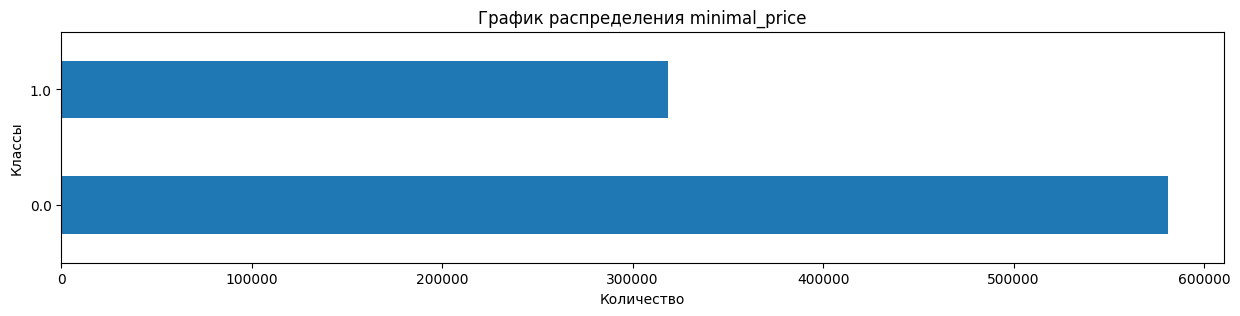

Распределение признака по классам в процентах


0.0    64.590944
1.0    35.409056
Name: minimal_price, dtype: float64

In [61]:
df_orders.minimal_price.value_counts().plot.barh(figsize=(15, 3))
plt.title('График распределения minimal_price')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['minimal_price'].value_counts(normalize=True)*100

##### teacher_sex

In [62]:
print(f'Уникальные значения столбца teacher_sex: {sorted(df_orders.teacher_sex.unique())}')

Уникальные значения столбца teacher_sex: [0, 1, 2, 3]


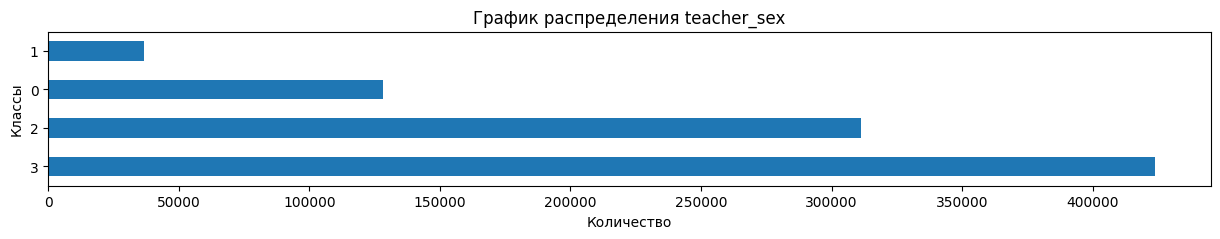

Распределение признака по классам в процентах


3    47.100633
2    34.591078
0    14.240176
1     4.068114
Name: teacher_sex, dtype: float64

In [63]:
df_orders.teacher_sex.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения teacher_sex')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['teacher_sex'].value_counts(normalize=True)*100

Согнасно полученной информации от заказчика:
- 0 - М
- 1 - Ж
- остальные - `Not  set` (их объединим)

In [64]:
# функция для замены значений в столбце teacher_sex в зависимости от числа значений
def teacher_sex_fix(row):
    if row['teacher_sex'] in [3, 2]:
        return 2
    elif row['teacher_sex']==0:
        return 0
    return 1

In [65]:
%%time
df_orders['teacher_sex'] = df_orders.apply(teacher_sex_fix, axis=1)

CPU times: user 6.22 s, sys: 76 ms, total: 6.3 s
Wall time: 6.3 s


##### teacher_experience

In [66]:
df_orders['teacher_experience_from'].value_counts(normalize=True).head()*100

0     69.945801
5     15.843578
1      5.182973
10     4.926202
2      1.384963
Name: teacher_experience_from, dtype: float64

In [67]:
df_orders['teacher_experience_to'].value_counts(normalize=True).head()*100

0      98.499151
100     0.429544
50      0.277548
10      0.169107
60      0.136330
Name: teacher_experience_to, dtype: float64

In [68]:
df_orders = df_orders.drop('teacher_experience_to', axis=1)

In [69]:
%%time
teacher_experience_from_change = partial(change, col='teacher_experience_from')
df_orders['teacher_experience_from'] = df_orders.apply(teacher_experience_from_change, axis=1)

CPU times: user 5.93 s, sys: 72 ms, total: 6 s
Wall time: 6 s


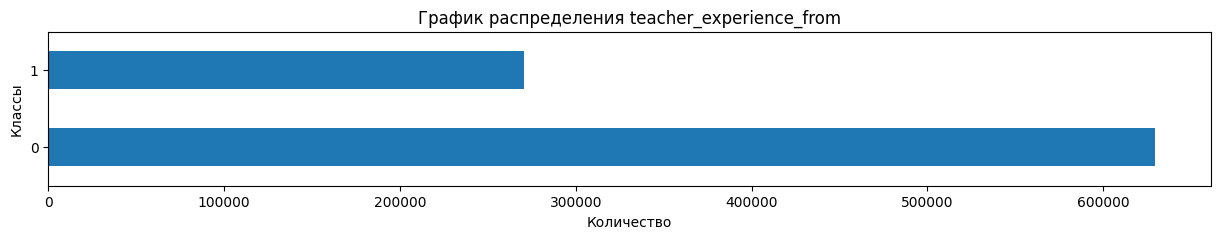

Распределение признака по классам в процентах


0    69.945801
1    30.054199
Name: teacher_experience_from, dtype: float64

In [70]:
df_orders.teacher_experience_from.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения teacher_experience_from')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['teacher_experience_from'].value_counts(normalize=True)*100

##### lesson_place_new

In [71]:
print(f'Уникальные значения столбца lesson_place_new: {sorted(df_orders.lesson_place_new.unique())}')

Уникальные значения столбца lesson_place_new: [0, 1, 2, 3, 4, 5, 6, 7]


In [72]:
%%time
lesson_place_new_fix = partial(fix, col='lesson_place_new')
df_orders['lesson_place_new'] = df_orders.apply(lesson_place_new_fix, axis=1)

CPU times: user 49.7 s, sys: 220 ms, total: 50 s
Wall time: 50 s


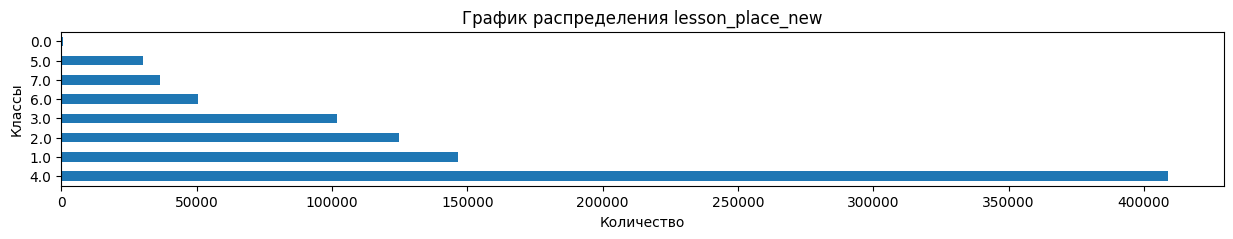

Распределение признака по классам в процентах


4.0    45.447677
1.0    16.270677
2.0    13.874519
3.0    11.314476
6.0     5.611961
7.0     4.072447
5.0     3.343800
0.0     0.064443
Name: lesson_place_new, dtype: float64

In [73]:
df_orders.lesson_place_new.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения lesson_place_new')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['lesson_place_new'].value_counts(normalize=True)*100

In [74]:
df_orders = df_orders.loc[df_orders.lesson_place_new != 0]

##### pupil_knowledgelvl

In [75]:
print(f'Уникальные значения столбца pupil_knowledgelvl: {sorted(df_orders.pupil_knowledgelvl.unique())}')

Уникальные значения столбца pupil_knowledgelvl: [0, 1, 2, 3, 4]


In [76]:
df_orders['pupil_knowledgelvl'].value_counts(normalize=True)*100

0    77.494986
2     9.986392
1     7.319411
3     4.546031
4     0.653181
Name: pupil_knowledgelvl, dtype: float64

In [77]:
%%time
pupil_knowledgelvl_change = partial(change, col='pupil_knowledgelvl')
df_orders['pupil_knowledgelvl'] = df_orders.apply(pupil_knowledgelvl_change, axis=1)

CPU times: user 5.92 s, sys: 48 ms, total: 5.97 s
Wall time: 5.97 s


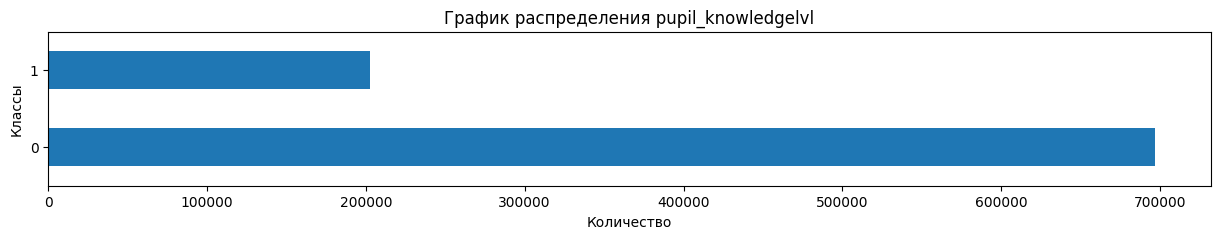

Распределение признака по классам в процентах


0    77.494986
1    22.505014
Name: pupil_knowledgelvl, dtype: float64

In [78]:
df_orders.pupil_knowledgelvl.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения pupil_knowledgelvl')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['pupil_knowledgelvl'].value_counts(normalize=True)*100

##### teacher_age

In [79]:
df_orders['teacher_age_from'].value_counts(normalize=True).head()*100

0     63.318561
25    13.759945
30     4.777618
16     4.619632
18     3.826253
Name: teacher_age_from, dtype: float64

In [80]:
df_orders['teacher_age_to'].value_counts(normalize=True).head()*100

0     68.339330
50    11.748703
80     3.586215
90     3.389538
30     1.901286
Name: teacher_age_to, dtype: float64

In [81]:
%%time
teacher_age_from_change = partial(change, col='teacher_age_from')
df_orders['teacher_age_from'] = df_orders.apply(teacher_age_from_change, axis=1)

teacher_age_to_change = partial(change, col='teacher_age_to')
df_orders['teacher_age_to'] = df_orders.apply(teacher_age_to_change, axis=1)

CPU times: user 11.7 s, sys: 164 ms, total: 11.8 s
Wall time: 11.8 s


In [82]:
teacher_age_corr = df_orders['teacher_age_from'].corr(df_orders['teacher_age_to'])
print(f"Корреляция между столбцами teacher_age_from и teacher_age_to = {teacher_age_corr}")

Корреляция между столбцами teacher_age_from и teacher_age_to = 0.675957434067894


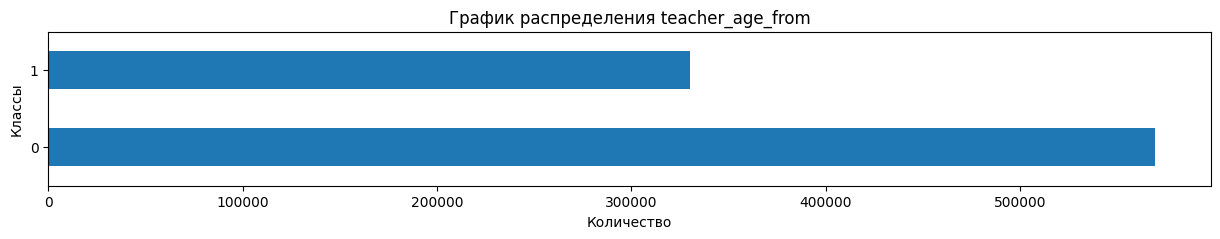

Распределение признака по классам в процентах


0    63.318561
1    36.681439
Name: teacher_age_from, dtype: float64

In [83]:
df_orders.teacher_age_from.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения teacher_age_from')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['teacher_age_from'].value_counts(normalize=True)*100

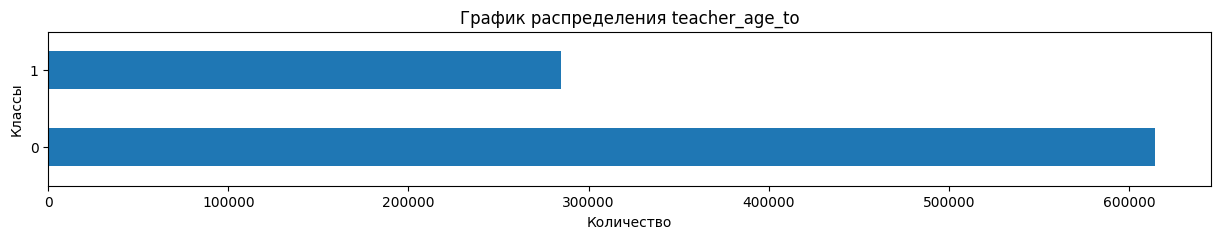

Распределение признака по классам в процентах


0    68.33933
1    31.66067
Name: teacher_age_to, dtype: float64

In [84]:
df_orders.teacher_age_to.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения teacher_age_to')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['teacher_age_to'].value_counts(normalize=True)*100

##### chosen_teachers_only

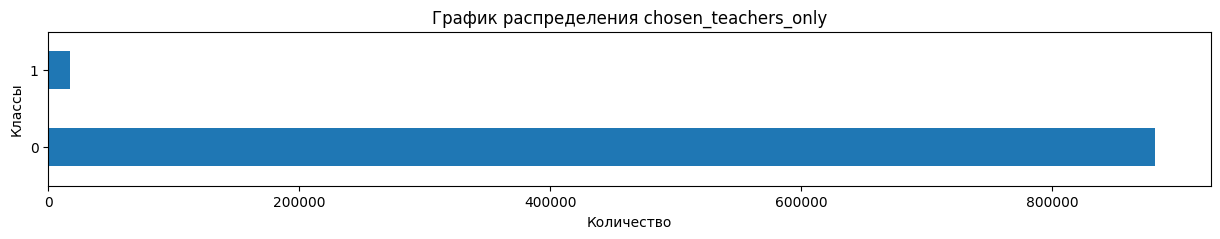

Распределение признака по классам в процентах


0    98.097158
1     1.902842
Name: chosen_teachers_only, dtype: float64

In [85]:
df_orders.chosen_teachers_only.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения chosen_teachers_only')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['chosen_teachers_only'].value_counts(normalize=True)*100

In [86]:
df_orders = df_orders.drop('chosen_teachers_only', axis=1)

Слишком большой дисбаланс классов.

##### no_teachers_available

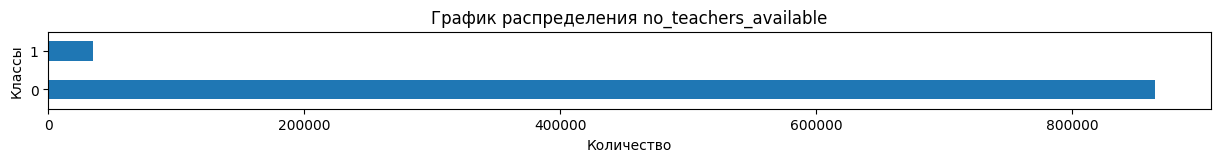

Распределение признака по классам в процентах


0    96.147954
1     3.852046
Name: no_teachers_available, dtype: float64

In [87]:
df_orders.no_teachers_available.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения no_teachers_available')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['no_teachers_available'].value_counts(normalize=True)*100

In [88]:
df_orders = df_orders.drop('no_teachers_available', axis=1)

Слишком большой дисбаланс классов.

##### source_id

In [89]:
df_orders['source_id'].value_counts(normalize=True).head()*100

14    36.513224
23    33.125687
16    20.963173
8      2.783053
9      1.396752
Name: source_id, dtype: float64

Проблемы со столбцом не выявлены.

##### client_id

In [90]:
df_orders['client_id'].value_counts().head()

1012593    195
683264     148
810610     114
1177574    113
725678     105
Name: client_id, dtype: int64

Проблем со столбцом нет, но у некоторых клиентов больше 100 заявок.

##### is_display_to_teachers

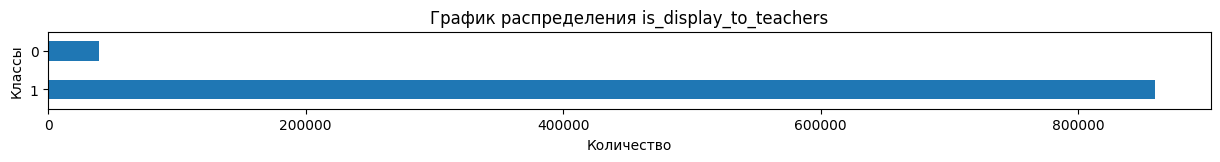

Распределение признака по классам в процентах


1    95.595279
0     4.404721
Name: is_display_to_teachers, dtype: float64

In [91]:
df_orders.is_display_to_teachers.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_display_to_teachers')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_orders['is_display_to_teachers'].value_counts(normalize=True)*100

In [92]:
df_orders = df_orders.drop('is_display_to_teachers', axis=1)

Слишком большой дисбаланс классов.

##### Резервный файл

In [93]:
# df_orders.to_csv('/home/user/main_folder/repetit/datasets/df_orders_clear.csv', index=False)

In [94]:
df_orders_clear = df_orders.copy()

In [95]:
# df_orders_clear = pd.read_csv('/home/user/main_folder/repetit/datasets/df_orders_clear.csv')

In [96]:
del df_orders

##### status_id

Из данного столбца формируется наш целевой признак.

- 5,6,13,15 - оплачено (1)
- другое - неоплачено (0)

Поскольку у нас создаются дубликаты одной заявки, будем называть `1` все заявки, которые в итоге оплатили.

In [97]:
sorted(df_orders_clear.status_id.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]

In [98]:
paid = [5,6,13,15]

Для дальнейшего упрощения расчетов заменим необходимые статусы на 1 и 0.

Будем считать заявку оплаченной, если хотя бы один из дублей оплачен.

In [99]:
# функция обозначения оплаты для текущей заявки
def target_main(row):
    if row['status_id'] in paid:
        return 1
    return 0

In [100]:
%%time
df_orders_clear['target_main'] = df_orders_clear.apply(target_main, axis=1)

CPU times: user 5.79 s, sys: 76 ms, total: 5.86 s
Wall time: 5.86 s


In [101]:
df_orders_clear.head()

,id,subject_id,lesson_price,lesson_duration,working_teacher_id,status_id,amount_to_pay,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,source_id,original_order_id,client_id,target_main
0,2294054,1.0,3000,60,61132,16,0.0,10.0,12.0,2.0,1.0,2,0,2.0,0,0,0,18,2294000,675960,0
1,2294055,1.0,3000,60,61132,7,0.0,10.0,12.0,2.0,1.0,2,0,2.0,0,0,0,18,2294000,675960,0
2,2294056,21.0,800,60,143480,16,0.0,7.0,14.0,2.0,0.0,2,0,4.0,0,0,0,23,0,1024439,0
3,2294057,8.0,700,60,236392,16,0.0,10.0,10.0,3.0,0.0,2,1,4.0,0,1,1,14,2293804,1024340,0
11,2294065,5.0,900,60,27203,7,0.0,7.0,14.0,3.0,0.0,0,0,4.0,0,0,0,16,2293937,806382,0


In [102]:
# df_orders_clear = df_orders_clear[['id', 'original_order_id', 'target_main']]

In [103]:
# Функция подсчета дублей у оригинальной заявки и выявление наличия среди дублей факта оплаты одного из дублей
def target(row):
    if row['original_order_id'] == 0:
        orig_id = row['id']
        
        id_list = [orig_id]
        id_list.extend(df_orders_clear.loc[df_orders_clear.original_order_id == orig_id, 'id'].values)
        
        target_list = []
        for i in id_list:
            target_list.append(df_orders_clear.loc[df_orders_clear.id==i, 'target_main'].values[0])
        return [len(target_list), max(target_list)]
    return [-1, -1]

In [104]:
%%time
df_orders_clear[['count_target', 'target']] = df_orders_clear.apply(lambda row: pd.Series(target(row)), axis=1)

CPU times: user 16min 30s, sys: 4.11 s, total: 16min 34s
Wall time: 16min 34s


In [105]:
df_orders_clear.head(3)

,id,subject_id,lesson_price,lesson_duration,working_teacher_id,status_id,amount_to_pay,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,source_id,original_order_id,client_id,target_main,count_target,target
0,2294054,1.0,3000,60,61132,16,0.0,10.0,12.0,2.0,1.0,2,0,2.0,0,0,0,18,2294000,675960,0,-1,-1
1,2294055,1.0,3000,60,61132,7,0.0,10.0,12.0,2.0,1.0,2,0,2.0,0,0,0,18,2294000,675960,0,-1,-1
2,2294056,21.0,800,60,143480,16,0.0,7.0,14.0,2.0,0.0,2,0,4.0,0,0,0,23,0,1024439,0,2,0


In [106]:
# Функция заполнения целевого признака дубликатов из оригинальных заявок 
def target_fix_final(row):
    if row['target'] == -1:
        orig_id = row['original_order_id']
        new_count_target = df_orders_clear.loc[df_orders_clear.id == orig_id, 'count_target']
        new_target = df_orders_clear.loc[df_orders_clear.id == orig_id, 'target']
        
        try:
            return [new_count_target.values[0], new_target.values[0]]
        except:
            pass
    return [row['count_target'], row['target']]

In [107]:
%%time
df_orders_clear[['count_target_fix', 'target_fix']] = df_orders_clear.apply(lambda row: pd.Series(target_fix_final(row)), axis=1)

CPU times: user 13min 5s, sys: 2.84 s, total: 13min 7s
Wall time: 13min 7s


In [108]:
df_orders_clear.head(3)

,id,subject_id,lesson_price,lesson_duration,working_teacher_id,status_id,amount_to_pay,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,source_id,original_order_id,client_id,target_main,count_target,target,count_target_fix,target_fix
0,2294054,1.0,3000,60,61132,16,0.0,10.0,12.0,2.0,1.0,2,0,2.0,0,0,0,18,2294000,675960,0,-1,-1,-1.0,-1.0
1,2294055,1.0,3000,60,61132,7,0.0,10.0,12.0,2.0,1.0,2,0,2.0,0,0,0,18,2294000,675960,0,-1,-1,-1.0,-1.0
2,2294056,21.0,800,60,143480,16,0.0,7.0,14.0,2.0,0.0,2,0,4.0,0,0,0,23,0,1024439,0,2,0,2.0,0.0


In [109]:
df_orders_clear = df_orders_clear.drop('status_id', axis=1)

##### Обработка бинарных столбцов

In [110]:
binar_cols = ['amount_to_pay', 'minimal_price', 'teacher_experience_from',
              'pupil_knowledgelvl', 'teacher_age_from', 'teacher_age_to']

In [113]:
%%time
df_orders_clear['binar_total'] = df_orders_clear.apply(binar_total, axis=1)

CPU times: user 4min 11s, sys: 5.15 s, total: 4min 16s
Wall time: 4min 9s


In [114]:
df_orders_clear = df_orders_clear.drop(binar_cols, axis=1)

##### Оценка дисбаланса целевого признака

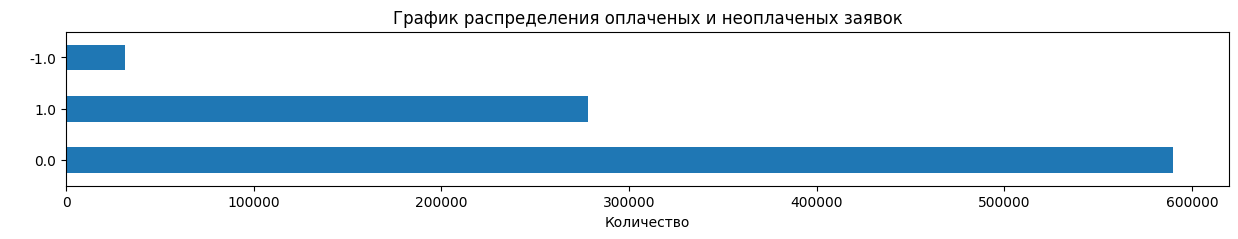

Распределение целевого признака по классам в процентах


 0.0    65.606086
 1.0    30.912430
-1.0     3.481484
Name: target_fix, dtype: float64

In [115]:
df_orders_clear.target_fix.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения оплаченых и неоплаченых заявок')
plt.ylabel(' ')
plt.xlabel('Количество')
plt.show()

print('Распределение целевого признака по классам в процентах')
df_orders_clear['target_fix'].value_counts(normalize=True)*100

In [116]:
df_orders_clear = df_orders_clear.loc[df_orders_clear.target_fix != -1]

In [117]:
df_orders_clear = df_orders_clear.drop(['target_main', 'count_target', 'target'], axis=1)

Обнаружен дисбаланс классов, что характерно для данной задачи обработки заявок.

Столбец `status_id` оставим и оценим на мультиколинеарность, поскольку этап заявки может влиять на итоговое решение оплаты.

##### Вывод по итогу исследования данных в таблице orders

- Обработал пропуски
- Удалил дубликаты
- Изучил распределения данных

Распределение целевого признака обладает частичным дисбалансом. Обработку будем проводить в случае необходимости.

##### Резервный файл orders

In [118]:
# df_orders_clear.to_csv('/home/user/main_folder/repetit/datasets/df_orders_final.csv', index=False)

In [119]:
df_orders_final = df_orders_clear.copy()

In [ ]:
# df_orders_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_orders_final.csv')

In [123]:
# del df_orders_clear

#### Информация об учителях

In [124]:
display(df_teachers_info.head(2).style.set_caption('Информация об учителях'))
print(f"Количество явных дубликатов: {df_teachers_info.duplicated().sum()}\n")

,id,date_update,reg_date,birth_date,teaching_start_date,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,external_comments,lesson_duration,lesson_cost,status_id,status_relevant_date,status_school_id,status_college_id,status_display,russian_level_id,home_country_id,information,is_confirmed,external_comments.1,lesson_duration.1,lesson_cost.1,status_id.1,status_relevant_date.1,status_school_id.1,status_college_id.1,status_display.1,russian_level_id.1,home_country_id.1,information.1,is_confirmed.1,external_comments.2,lesson_duration.2,lesson_cost.2,status_id.2,status_relevant_date.2,status_school_id.2,status_college_id.2,status_display.2,russian_level_id.2,home_country_id.2,photo_path,information.2,is_confirmed.2,is_display,rating_id,rating,comments,rules_confirmed_date,last_visited,is_pupils_needed,is_cell_phone_confirmed,effective_rating,area_id,pupil_needed_date,sex,amount_to_pay,is_remote_lessons,remote_comments,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,passport_id,is_edited,orders_allowed,display_days,verification_status_id,is_individual,partner_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,is_display_at_partners,status_institution_id,free_time_relevance_date
0,33,2023-11-07 14:20:28.323,2007-12-24 19:26:46.000,1983-06-05 00:00:00.000,1989-09-01 00:00:00.000,45,0,0,0,nan,60,1000,4,nan,nan,nan,0,5,7,"[p] [/p][p] [/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p] [/p][p]родордророрлуот [/p][p] [/p]",1,nan,60,1000,4,nan,nan,nan,0,5,7,"[p] [/p][p] [/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p] [/p][p]родордророрлуот [/p][p] [/p]",1,nan,60,1000,4,nan,nan,nan,0,5,7,/teachers/33/photo/photo_small.jpg,"[p] [/p][p] [/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p] [/p][p]родордророрлуот [/p][p] [/p]",1,1,15,5,Швачко М.Н. 15.01.2018 14:59 - 33 Аникеева А.В. 03.04.2019 12:12 - тест Нейман В.Л. 10.02.2023 17:11 - Тестовый коммент Нейман В.Л. 10.02.2023 17:13 - test Николаев А.В. 12.09.2023 13:40 - test1 Николаев А.В. 12.09.2023 13:40 - test2 Николаев А.В. 12.09.2023 13:40 - test4 Николаев А.В. 12.09.2023 13:40 - test883 et set set ! Николаев А.В. 12.09.2023 17:24 - Длинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинный комментарий Николаев А.В. 12.09.2023 17:25 - Длинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинный предлинныйпредлинныйпредлинный предлинныйпредлинный комментарий,2016-02-12 21:06:51.000,2022-10-24 16:48:38.410,1.000000,0,4.679688,1,nan,1,500,1,nan,0,1,0,1138.000000,237.500000,nan,1,0,492.000000,1,nan,nan,4.500000,1138.000000,6,2022-05-16 18:44:59.993,0,3702.000000,2023-11-06 14:20:15.173
1,46,2023-01-19 17:36:42.233,2007-12-24 19:26:46.000,1980-02-12 00:00:00.000,2003-09-01 00:00:00.000,63,0,1,1,nan,60,500,5,nan,nan,nan,1,5,7,nan,1,nan,60,500,5,nan,nan,nan,1,5,7,nan,1,nan,60,500,5,nan,nan,nan,1,5,7,/teachers/46/photo/photo_small.webp,nan,1,0,4,-3,nan,2014-08-12 00:00:00.000,nan,1.000000,0,0.000000,1,nan,3,0,0,nan,0,1,1,25.000000,0.000000,nan,1,1,0.000000,1,nan,nan,4.300781,25.000000,0,2017-01-01 00:00:00.000,1,nan,nan


Количество явных дубликатов: 0



In [125]:
df_teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          307972 non-null  int32   
 1   date_update                 307972 non-null  category
 2   reg_date                    307972 non-null  category
 3   birth_date                  307972 non-null  category
 4   teaching_start_date         307972 non-null  category
 5   user_id                     307972 non-null  int32   
 6   is_email_confirmed          307972 non-null  int8    
 7   is_home_lessons             307972 non-null  int8    
 8   is_external_lessons         307972 non-null  int8    
 9   external_comments           90978 non-null   category
 10  lesson_duration             307972 non-null  int16   
 11  lesson_cost                 307972 non-null  int32   
 12  status_id                   307972 non-null  int8    
 13 

In [126]:
drop_cols = df_teachers_info.isna().sum().to_frame(name="nans").query("nans > 200000")["nans"]
display(drop_cols)

df_teachers_info = df_teachers_info.drop(drop_cols.index, axis=1)
del drop_cols

external_comments           216994
status_relevant_date        261593
status_school_id            293099
status_college_id           301429
external_comments.1         216994
status_relevant_date.1      261593
status_school_id.1          293099
status_college_id.1         301429
external_comments.2         216994
status_relevant_date.2      261593
status_school_id.2          293099
status_college_id.2         301429
comments                    263032
is_pupils_needed            296764
pupil_needed_date           278044
remote_comments             301929
passport_id                 306649
is_individual               229554
partner_id                  260238
status_institution_id       283070
free_time_relevance_date    306267
Name: nans, dtype: int64

##### Дублируемые столбцы

In [127]:
# Функция для проверки идентичности столбцов
def unique_val(col):
    res_1 = df_teachers_info[col].equals(df_teachers_info[col+'.1'])
    res_2 = df_teachers_info[col+'.1'].equals(df_teachers_info[col+'.2'])
    return res_1==res_2

In [128]:
cols = ['lesson_duration', 'lesson_cost', 'status_id', 'status_display', 'russian_level_id',
        'home_country_id', 'is_confirmed', 'information']

In [129]:
%%time

answers = []
for col in cols:
    answers.append(unique_val(col))

if False in answers == True:
    print('В списке есть отличающиеся столбцы')
else:
    
    print('Столбцы идентичны')

Столбцы идентичны
CPU times: user 1.3 s, sys: 12 ms, total: 1.31 s
Wall time: 1.31 s


In [130]:
# cols_1 = [x+'.1' for x in cols]
# cols_2 = [x+'.2' for x in cols]
drop_cols = [x+'.1' for x in cols] + [x+'.2' for x in cols]
drop_cols

['lesson_duration.1',
 'lesson_cost.1',
 'status_id.1',
 'status_display.1',
 'russian_level_id.1',
 'home_country_id.1',
 'is_confirmed.1',
 'information.1',
 'lesson_duration.2',
 'lesson_cost.2',
 'status_id.2',
 'status_display.2',
 'russian_level_id.2',
 'home_country_id.2',
 'is_confirmed.2',
 'information.2']

In [131]:
df_teachers_info = df_teachers_info.drop(drop_cols, axis=1)
del drop_cols

##### date_update

In [132]:
today = pd.Timestamp.today().normalize()

In [133]:
date_update = (today - pd.to_datetime(df_teachers_info['date_update'], errors='coerce')).dt.days
df_teachers_info['date_update'] = date_update
del date_update

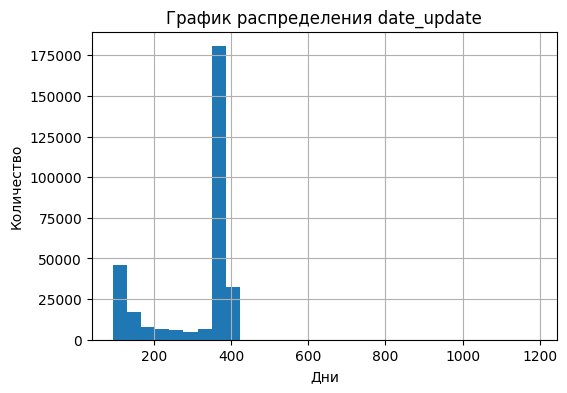

In [134]:
df_teachers_info.date_update.hist(figsize=(6,4), bins=30)

plt.title('График распределения date_update')
plt.ylabel('Количество')
plt.xlabel('Дни')
plt.show()

In [135]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.date_update <= 600)]

##### reg_date

In [136]:
reg_date = round((today - pd.to_datetime(df_teachers_info['reg_date'], errors='coerce')).dt.days / 365, 1)
df_teachers_info['reg_date'] = reg_date
del reg_date

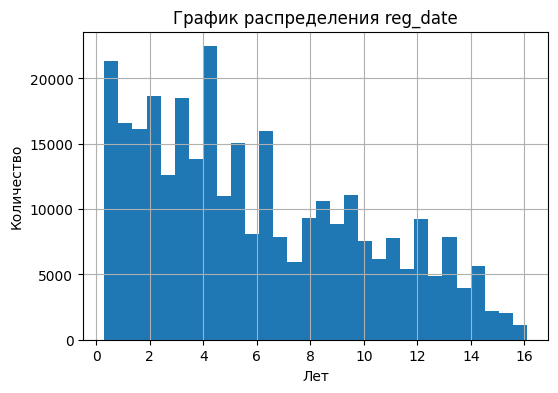

In [137]:
df_teachers_info.reg_date.hist(figsize=(6,4), bins=30)

plt.title('График распределения reg_date')
plt.ylabel('Количество')
plt.xlabel('Лет')
plt.show()

##### birth_date

In [138]:
birth_date = round((today - pd.to_datetime(df_teachers_info['birth_date'], errors='coerce')).dt.days / 365, 1)

df_teachers_info['birth_date'] = birth_date
del birth_date

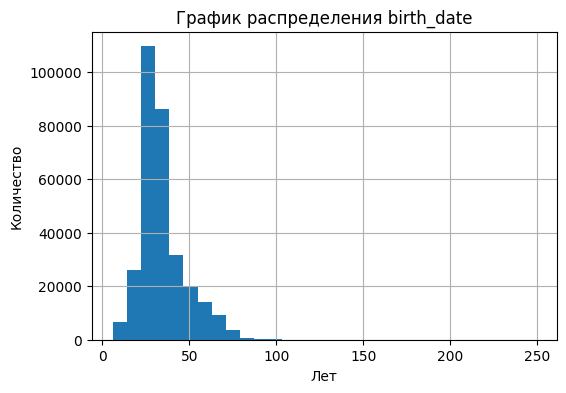

In [139]:
df_teachers_info.birth_date.hist(figsize=(6,4), bins=30)

plt.title('График распределения birth_date')
plt.ylabel('Количество')
plt.xlabel('Лет')
plt.show()

In [140]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.birth_date <= 80) & ((df_teachers_info.birth_date > 18))]

##### teaching_start_date

In [141]:
teaching_start_date = round((today - pd.to_datetime(df_teachers_info['teaching_start_date'],
                                                    errors='coerce')).dt.days / 365, 1)

df_teachers_info['teaching_start_date'] = teaching_start_date
del teaching_start_date

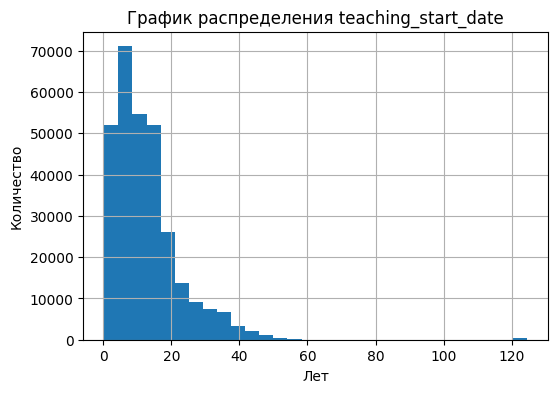

In [142]:
df_teachers_info.teaching_start_date.hist(figsize=(6,4), bins=30)

plt.title('График распределения teaching_start_date')
plt.ylabel('Количество')
plt.xlabel('Лет')
plt.show()

In [143]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.teaching_start_date <= 60]

##### is_email_confirmed

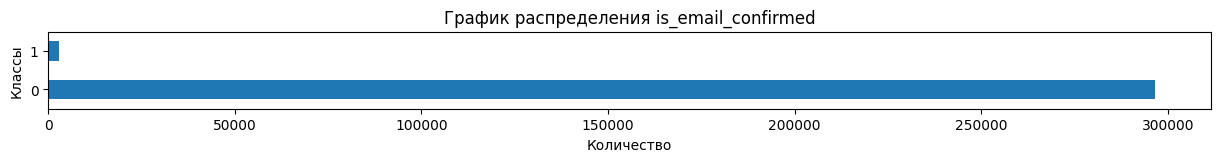

Распределение признака по классам в процентах


0    99.00253
1     0.99747
Name: is_email_confirmed, dtype: float64

In [144]:
df_teachers_info.is_email_confirmed.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_email_confirmed')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_email_confirmed'].value_counts(normalize=True)*100

##### is_home_lessons

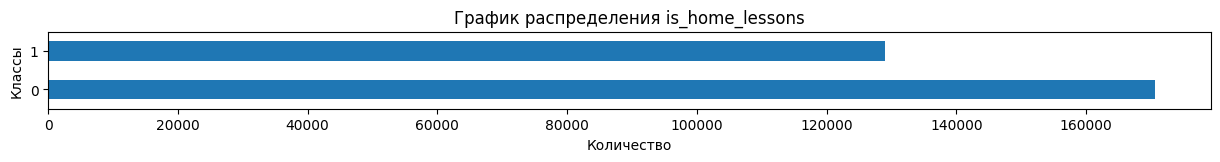

Распределение признака по классам в процентах


0    56.958599
1    43.041401
Name: is_home_lessons, dtype: float64

In [145]:
df_teachers_info.is_home_lessons.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_home_lessons')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_home_lessons'].value_counts(normalize=True)*100

##### is_external_lessons

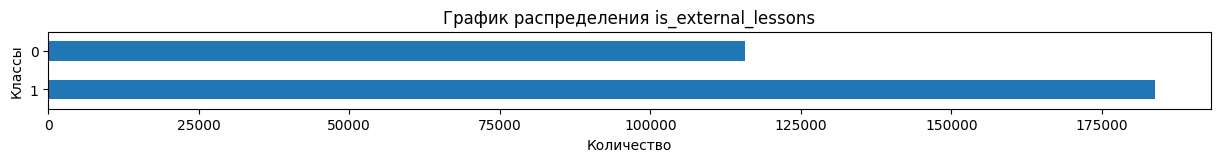

Распределение признака по классам в процентах


1    61.358949
0    38.641051
Name: is_external_lessons, dtype: float64

In [146]:
df_teachers_info.is_external_lessons.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_external_lessons')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_external_lessons'].value_counts(normalize=True)*100

##### lesson_duration

In [147]:
print(f'Уникальные значения столбца lesson_duration: {sorted(df_teachers_info.lesson_duration.unique())}')

Уникальные значения столбца lesson_duration: [1, 2, 3, 5, 6, 9, 12, 15, 18, 20, 24, 25, 30, 33, 34, 35, 40, 42, 45, 48, 50, 55, 60, 62, 65, 68, 69, 70, 75, 77, 80, 85, 90, 95, 96, 100, 102, 105, 110, 115, 120, 123, 125, 130, 132, 135, 140, 145, 150, 160, 180, 190, 200, 210, 228, 234, 240, 250, 300, 360, 400, 454, 456, 460, 500, 600, 601, 608, 609, 622, 700, 800, 900, 901, 908, 990, 999]


In [148]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.lesson_duration>=25) &
                                        (df_teachers_info.lesson_duration<=240)]

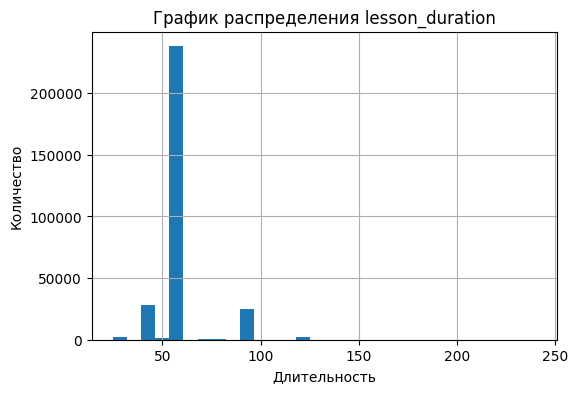

In [149]:
df_teachers_info.lesson_duration.hist(figsize=(6,4), bins=30)

plt.title('График распределения lesson_duration')
plt.ylabel('Количество')
plt.xlabel('Длительность')
plt.show()

##### lesson_cost

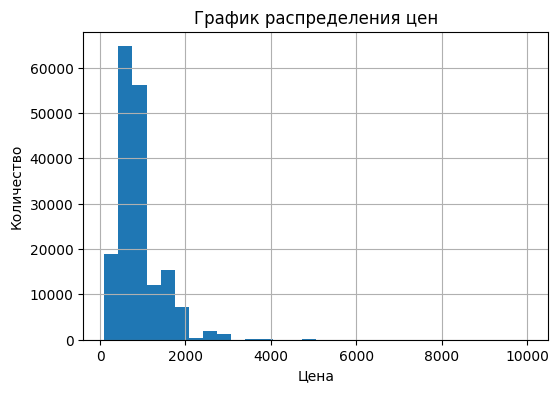

In [150]:
df_teachers_info.lesson_cost.hist(figsize=(6,4), range=(100, 10001), bins=30)

plt.title('График распределения цен')
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.show()

In [151]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.lesson_cost >= 200) &
                                        (df_teachers_info.lesson_cost <= 10000)]

##### status_id

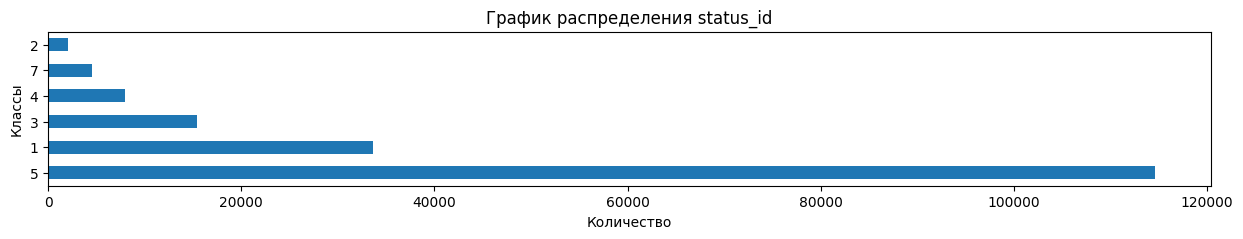

Распределение признака по классам в процентах


5    64.295087
1    18.889836
3     8.616977
4     4.457927
7     2.559804
2     1.180369
Name: status_id, dtype: float64

In [152]:
df_teachers_info.status_id.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения status_id')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['status_id'].value_counts(normalize=True)*100

##### status_display

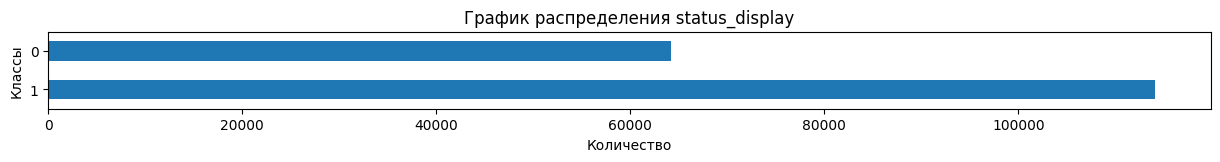

Распределение признака по классам в процентах


1    63.984994
0    36.015006
Name: status_display, dtype: float64

In [153]:
df_teachers_info.status_display.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения status_display')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['status_display'].value_counts(normalize=True)*100

##### russian_level_id

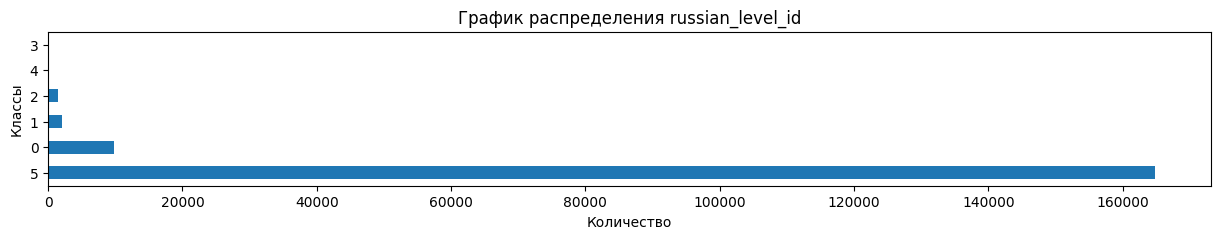

Распределение признака по классам в процентах


5    92.440589
0     5.477363
1     1.120370
2     0.786165
4     0.105420
3     0.070093
Name: russian_level_id, dtype: float64

In [154]:
df_teachers_info.russian_level_id.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения russian_level_id')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['russian_level_id'].value_counts(normalize=True)*100

In [155]:
df_teachers_info = df_teachers_info.drop('russian_level_id', axis=1)

##### home_country_id

In [156]:
print('Распределение признака по классам в процентах')
df_teachers_info['home_country_id'].value_counts(normalize=True)*100

Распределение признака по классам в процентах


7      97.464869
1       0.482241
13      0.357195
6       0.105981
10      0.103738
         ...    
202     0.000561
205     0.000561
155     0.000561
173     0.000561
181     0.000561
Name: home_country_id, Length: 134, dtype: float64

In [157]:
df_teachers_info = df_teachers_info.drop('home_country_id', axis=1)

##### information

В столбце присутствует большое количество пропусков. содадим из столбца бинарный признак

In [158]:
# type(df_teachers_info.information[1])==str

In [159]:
%%time
information_change_text = partial(change_text, col='information')
df_teachers_info['information'] = df_teachers_info.apply(information_change_text, axis=1)

CPU times: user 2.29 s, sys: 136 ms, total: 2.43 s
Wall time: 2.42 s


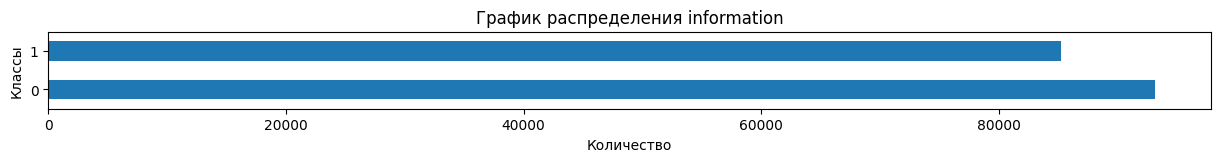

Распределение признака по классам в процентах


0    52.235693
1    47.764307
Name: information, dtype: float64

In [160]:
df_teachers_info.information.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения information')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['information'].value_counts(normalize=True)*100

##### is_confirmed

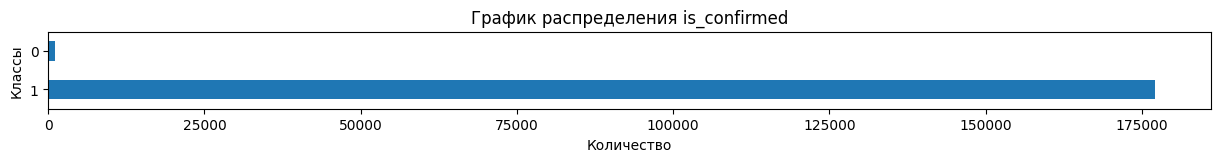

Распределение признака по классам в процентах


1    99.341685
0     0.658315
Name: is_confirmed, dtype: float64

In [161]:
df_teachers_info.is_confirmed.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_confirmed')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_confirmed'].value_counts(normalize=True)*100

In [162]:
df_teachers_info = df_teachers_info.drop('is_confirmed', axis=1)

##### photo_path

In [163]:
%%time
photo_path_change_text = partial(change_text, col='photo_path')
df_teachers_info['photo_path'] = df_teachers_info.apply(photo_path_change_text, axis=1)

CPU times: user 1.66 s, sys: 128 ms, total: 1.79 s
Wall time: 1.79 s


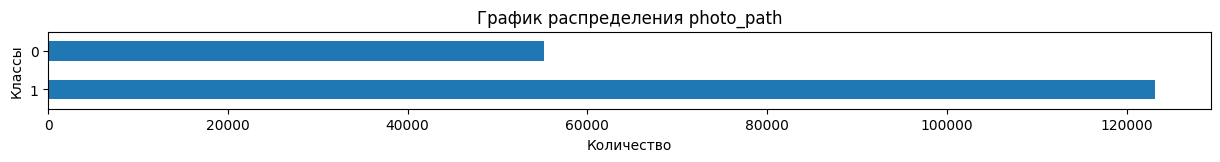

Распределение признака по классам в процентах


1    69.079929
0    30.920071
Name: photo_path, dtype: float64

In [164]:
df_teachers_info.photo_path.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения photo_path')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['photo_path'].value_counts(normalize=True)*100

##### is_display

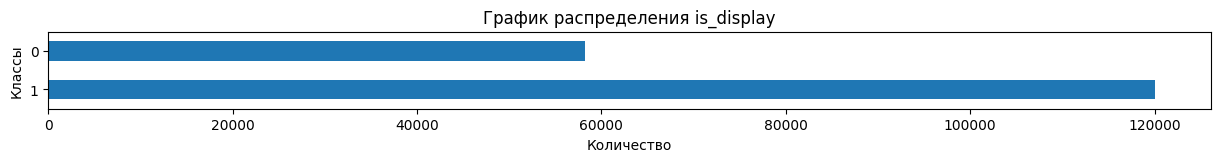

Распределение признака по классам в процентах


1    67.32816
0    32.67184
Name: is_display, dtype: float64

In [165]:
df_teachers_info.is_display.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_display')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_display'].value_counts(normalize=True)*100

##### rating_id

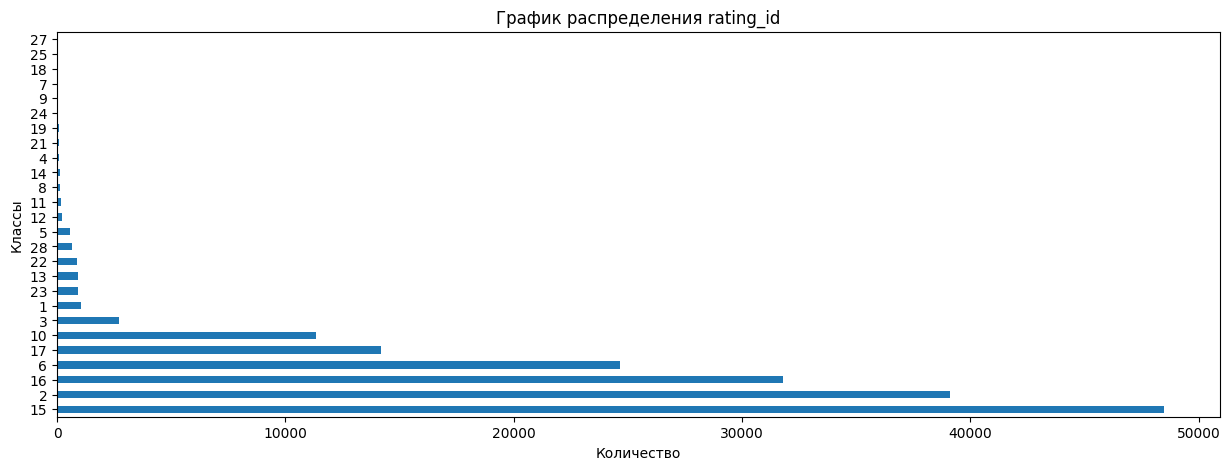

In [166]:
df_teachers_info.rating_id.value_counts().plot.barh(figsize=(15, 5))
plt.title('График распределения rating_id')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

# print('Распределение признака по классам в процентах')
# df_teachers_info['rating_id'].value_counts(normalize=True)*100

##### rating

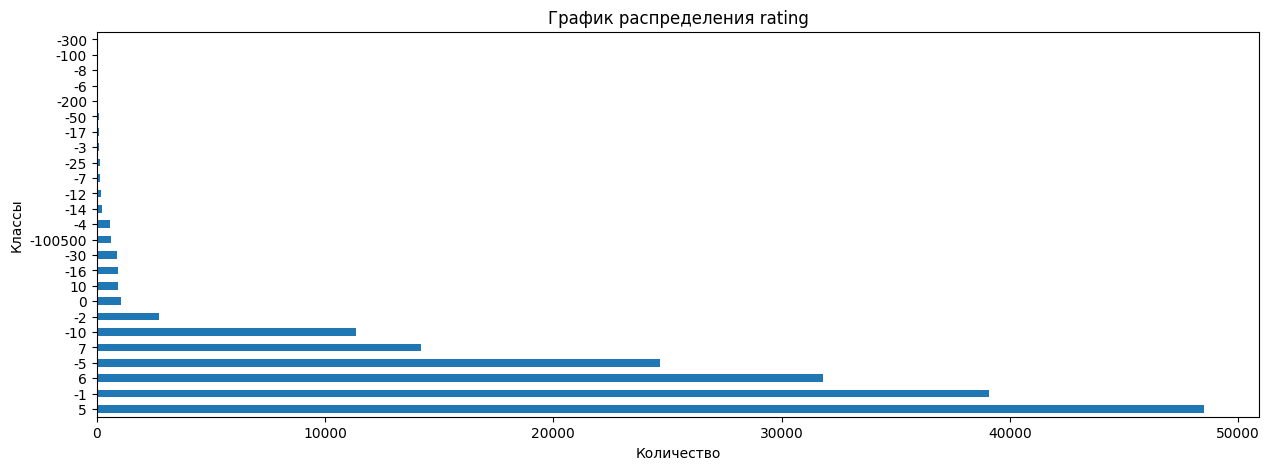

Распределение признака по классам в процентах


 5         27.195599
-1         21.915058
 6         17.831709
-5         13.833593
 7          7.954176
-10         6.357733
-2          1.526349
 0          0.597194
 10         0.520933
-16         0.513082
-30         0.485606
-100500     0.354952
-4          0.330840
-14         0.118878
-12         0.091962
-7          0.080747
-25         0.072897
-3          0.051589
-17         0.049906
-50         0.047663
-200        0.019626
-6          0.016822
-8          0.016822
-100        0.010654
-300        0.005607
Name: rating, dtype: float64

In [167]:
df_teachers_info.rating.value_counts().plot.barh(figsize=(15, 5))
plt.title('График распределения rating')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['rating'].value_counts(normalize=True)*100

Значение `-100500` скорее не увляется выбросом, оставим его.

##### rules_confirmed_date

In [168]:
rules_confirmed_date = round((today - pd.to_datetime(df_teachers_info['rules_confirmed_date'],
                                                     errors='coerce')).dt.days / 365, 1)

df_teachers_info['rules_confirmed_date'] = rules_confirmed_date
del rules_confirmed_date

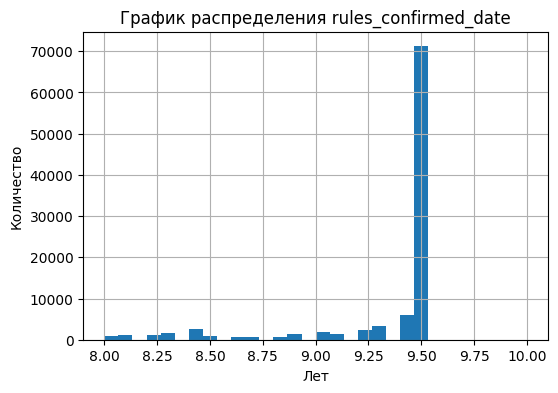

In [169]:
df_teachers_info.rules_confirmed_date.hist(figsize=(6,4), bins=30, range=(8,10))

plt.title('График распределения rules_confirmed_date')
plt.ylabel('Количество')
plt.xlabel('Лет')
plt.show()

Признак будет сильно коррелировать с `reg_date`. Не забудем оценить при проверке на мультиколлинеарность

##### last_visited

In [170]:
last_visited = round((today - pd.to_datetime(df_teachers_info['last_visited'],
                                                     errors='coerce')).dt.days / 365, 1)

df_teachers_info['last_visited'] = last_visited
df_teachers_info['last_visited'] = df_teachers_info['last_visited'].fillna(-1)
del last_visited

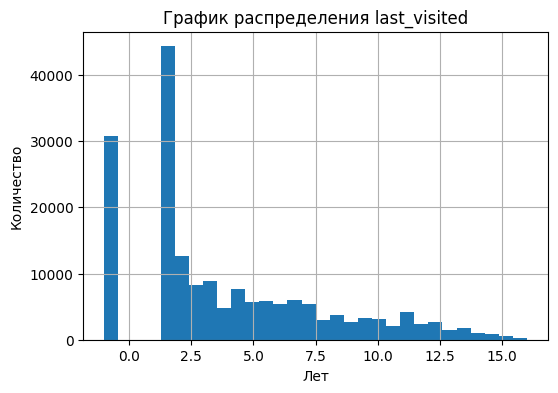

In [171]:
df_teachers_info.last_visited.hist(figsize=(6,4), bins=30)

plt.title('График распределения last_visited')
plt.ylabel('Количество')
plt.xlabel('Лет')
plt.show()

##### is_cell_phone_confirmed

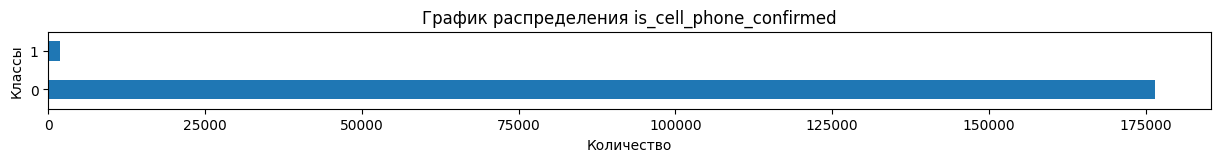

Распределение признака по классам в процентах


0    98.974396
1     1.025604
Name: is_cell_phone_confirmed, dtype: float64

In [172]:
df_teachers_info.is_cell_phone_confirmed.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_cell_phone_confirmed')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_cell_phone_confirmed'].value_counts(normalize=True)*100

In [173]:
df_teachers_info = df_teachers_info.drop('is_cell_phone_confirmed', axis=1)

##### effective_rating

In [174]:
display(sorted(df_teachers_info.effective_rating.unique())[:5]) # 5 минимальных уникальных значений
display(sorted(df_teachers_info.effective_rating.unique())[-5:]) # 5 максимальных уникальных значений
df_teachers_info.effective_rating.value_counts()

[-10000.0, -997.0, -507.0, -221.8, -194.0]

[25.0, 26.77, 11110.0, 11120.0, 11130.0]

 0.000000      118475
 9.000000        8728
-7.000000        6369
 8.000000        6363
-2.000000        5952
                ...  
-997.000000         1
-12.320312          1
-30.593750          1
 2.117188           1
 3.574219           1
Name: effective_rating, Length: 2326, dtype: int64

In [175]:
%%time
effective_rating_change = partial(change, col='effective_rating')
df_teachers_info['effective_rating'] = df_teachers_info.apply(effective_rating_change, axis=1)

CPU times: user 1.39 s, sys: 92.1 ms, total: 1.48 s
Wall time: 1.48 s


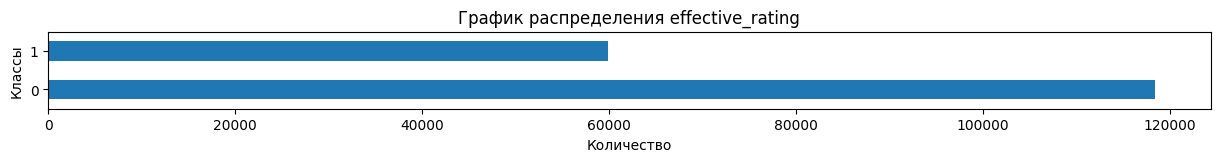

Распределение признака по классам в процентах


0    66.434331
1    33.565669
Name: effective_rating, dtype: float64

In [176]:
df_teachers_info.effective_rating.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения effective_rating')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['effective_rating'].value_counts(normalize=True)*100

##### area_id

In [177]:
print('Распределение признака по классам в процентах')
df_teachers_info['area_id'].value_counts(normalize=True)*100

Распределение признака по классам в процентах


1     60.838090
2     14.322003
14     1.439995
4      1.370462
6      1.267285
        ...    
87     0.005047
86     0.005047
78     0.003925
76     0.003925
89     0.002243
Name: area_id, Length: 89, dtype: float64

In [178]:
len(df_teachers_info['area_id'].value_counts())

89

In [179]:
def area_id(row):
    if row.area_id == 1:
        return 1
    if row.area_id == 2:
        return 2
    return 3

In [180]:
%%time
df_teachers_info['area_id'] = df_teachers_info.apply(area_id, axis=1)

CPU times: user 2.31 s, sys: 76.1 ms, total: 2.39 s
Wall time: 2.39 s


##### sex

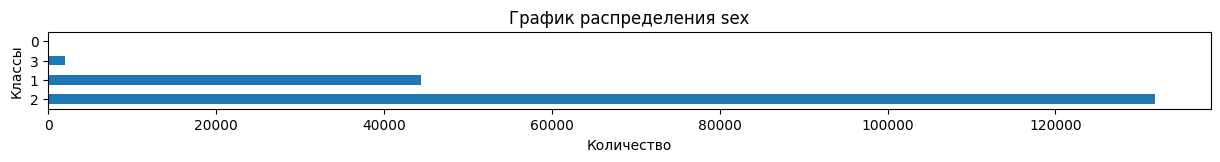

Распределение признака по классам в процентах


2    73.963462
1    24.939720
3     1.095697
0     0.001121
Name: sex, dtype: float64

In [181]:
df_teachers_info.sex.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения sex')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['sex'].value_counts(normalize=True)*100

In [182]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.sex != 0]

##### amount_to_pay

In [183]:
df_teachers_info.amount_to_pay.value_counts()

0      178329
500         3
Name: amount_to_pay, dtype: int64

In [184]:
df_teachers_info = df_teachers_info.drop('amount_to_pay', axis=1)

##### is_remote_lessons

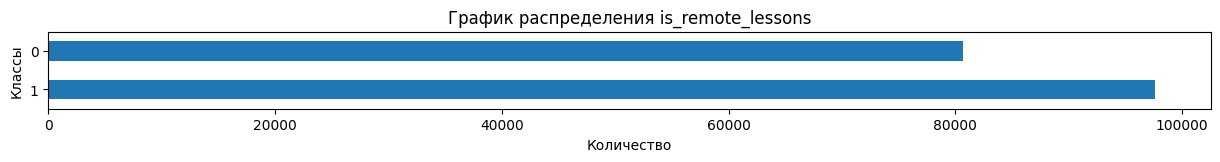

Распределение признака по классам в процентах


1    54.745082
0    45.254918
Name: is_remote_lessons, dtype: float64

In [185]:
df_teachers_info.is_remote_lessons.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_remote_lessons')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_remote_lessons'].value_counts(normalize=True)*100

##### show_on_map

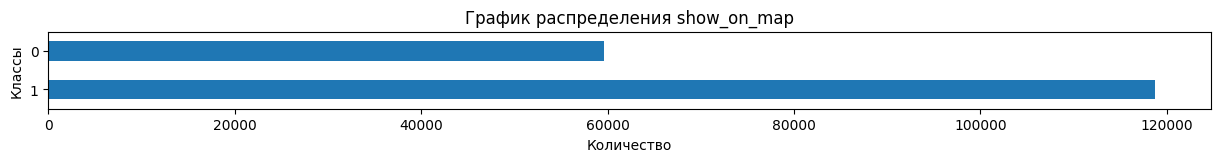

Распределение признака по классам в процентах


1    66.589283
0    33.410717
Name: show_on_map, dtype: float64

In [186]:
df_teachers_info.show_on_map.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения show_on_map')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['show_on_map'].value_counts(normalize=True)*100

##### send_mailing

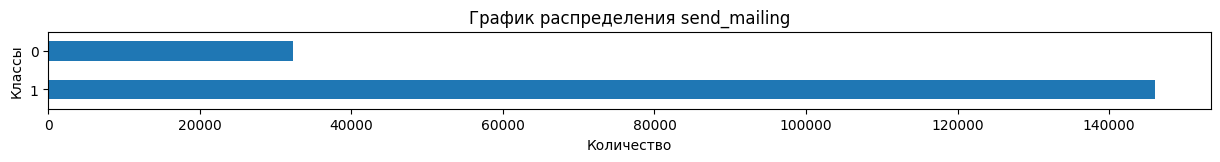

Распределение признака по классам в процентах


1    81.915753
0    18.084247
Name: send_mailing, dtype: float64

In [187]:
df_teachers_info.send_mailing.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения send_mailing')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['send_mailing'].value_counts(normalize=True)*100

##### send_suitable_orders

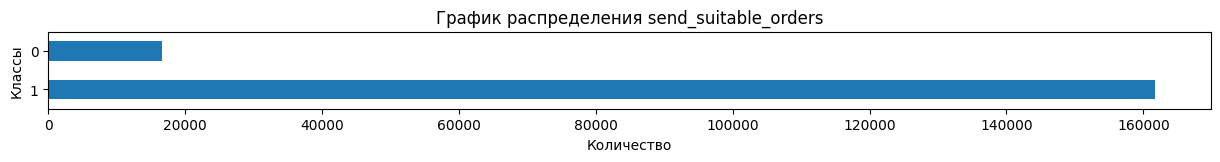

Распределение признака по классам в процентах


1    90.69993
0     9.30007
Name: send_suitable_orders, dtype: float64

In [188]:
df_teachers_info.send_suitable_orders.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения send_suitable_orders')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['send_suitable_orders'].value_counts(normalize=True)*100

##### rating_for_users

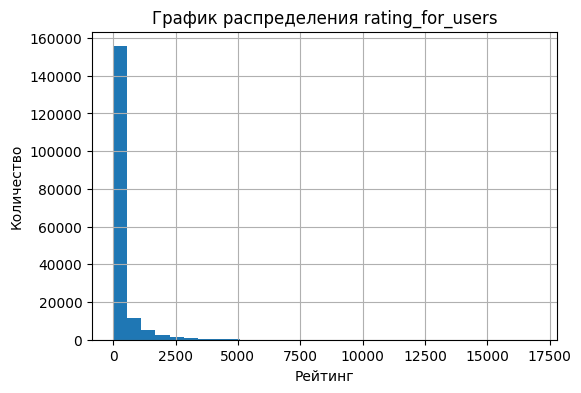

In [189]:
df_teachers_info.rating_for_users.hist(figsize=(6,4), bins=30)

plt.title('График распределения rating_for_users')
plt.ylabel('Количество')
plt.xlabel('Рейтинг')
plt.show()

In [190]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.rating_for_users <= 10_000]

##### rating_for_admin

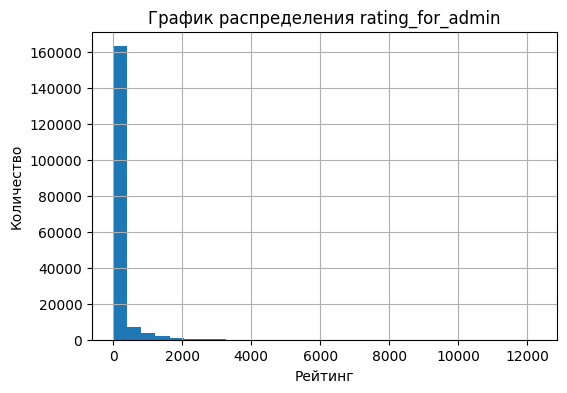

In [191]:
df_teachers_info.rating_for_admin.hist(figsize=(6,4), bins=30)

plt.title('График распределения rating_for_admin')
plt.ylabel('Количество')
plt.xlabel('Рейтинг')
plt.show()

In [192]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.rating_for_admin <= 9_000]

##### is_edited

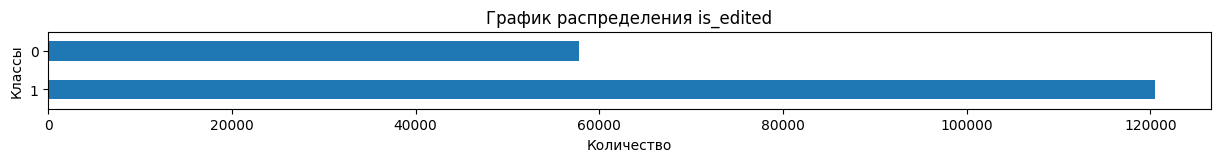

Распределение признака по классам в процентах


1    67.59779
0    32.40221
Name: is_edited, dtype: float64

In [193]:
df_teachers_info.is_edited.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_edited')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_edited'].value_counts(normalize=True)*100

##### orders_allowed

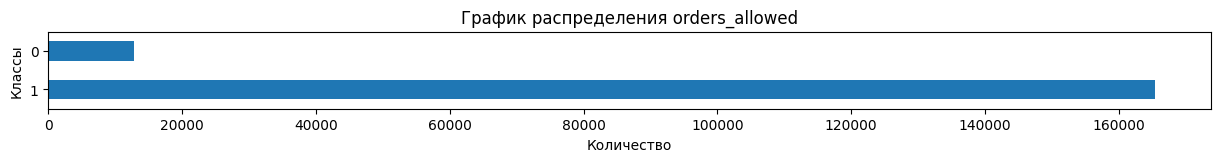

Распределение признака по классам в процентах


1    92.777388
0     7.222612
Name: orders_allowed, dtype: float64

In [194]:
df_teachers_info.orders_allowed.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения orders_allowed')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['orders_allowed'].value_counts(normalize=True)*100

##### display_days

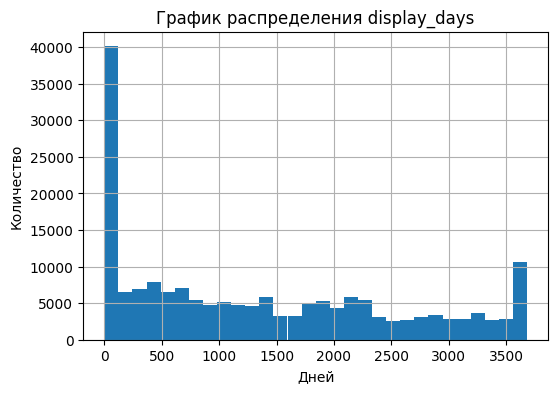

In [195]:
df_teachers_info.display_days.hist(figsize=(6,4), bins=30)

plt.title('График распределения display_days')
plt.ylabel('Количество')
plt.xlabel('Дней')
plt.show()

##### verification_status_id

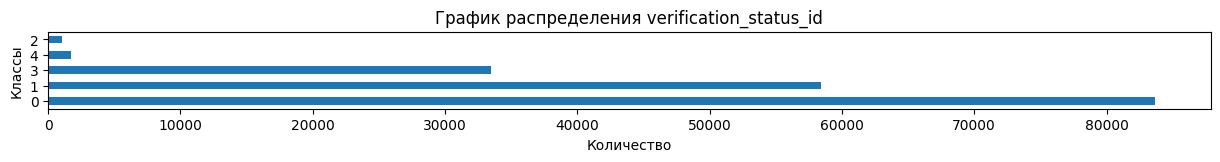

Распределение признака по классам в процентах


0    46.930993
1    32.765051
3    18.757255
4     0.978605
2     0.568096
Name: verification_status_id, dtype: float64

In [196]:
df_teachers_info.verification_status_id.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения verification_status_id')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['verification_status_id'].value_counts(normalize=True)*100

##### star_rating

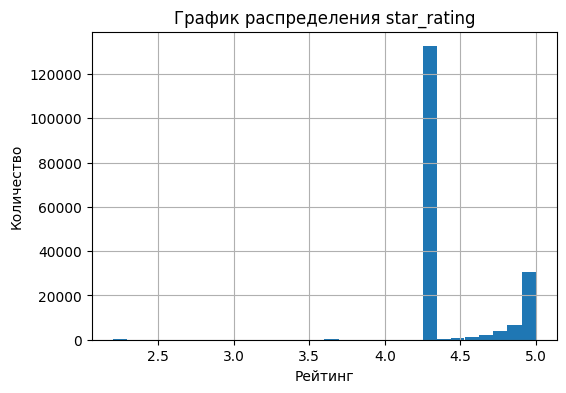

In [197]:
df_teachers_info.star_rating.hist(figsize=(6,4), bins=30)

plt.title('График распределения star_rating')
plt.ylabel('Количество')
plt.xlabel('Рейтинг')
plt.show()

In [198]:
df_teachers_info.star_rating.min()

2.2

##### rating_for_users_yesterday

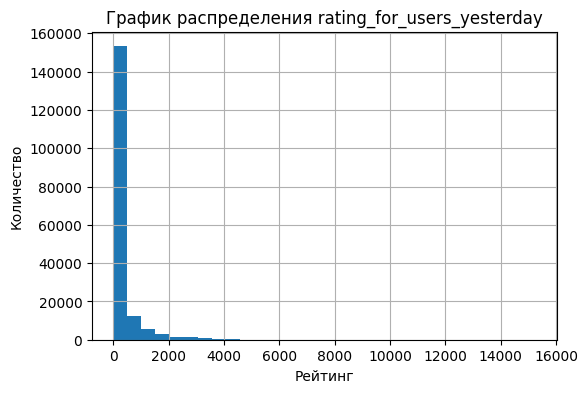

In [199]:
df_teachers_info.rating_for_users_yesterday.hist(figsize=(6,4), bins=30)

plt.title('График распределения rating_for_users_yesterday')
plt.ylabel('Количество')
plt.xlabel('Рейтинг')
plt.show()

##### review_num

In [200]:
print('Распределение признака по классам в процентах')
df_teachers_info['review_num'].value_counts(normalize=True)*100

Распределение признака по классам в процентах


0      73.167148
1       8.361607
2       4.121919
3       2.585313
4       1.924684
         ...    
193     0.000561
185     0.000561
133     0.000561
132     0.000561
159     0.000561
Name: review_num, Length: 130, dtype: float64

In [201]:
%%time
review_num_change = partial(change, col='review_num')
df_teachers_info['review_num'] = df_teachers_info.apply(review_num_change, axis=1)

CPU times: user 1.38 s, sys: 100 ms, total: 1.48 s
Wall time: 1.48 s


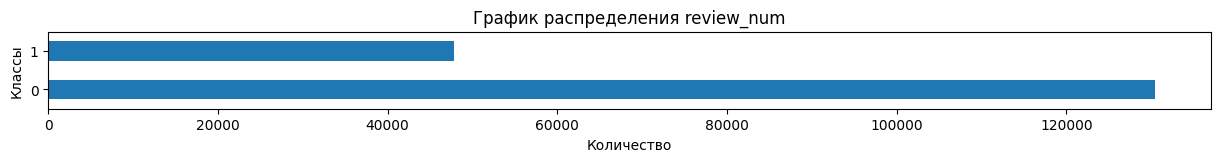

Распределение признака по классам в процентах


0    73.167148
1    26.832852
Name: review_num, dtype: float64

In [202]:
df_teachers_info.review_num.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения review_num')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['review_num'].value_counts(normalize=True)*100

##### relevance_date

In [203]:
relevance_date = round((today - pd.to_datetime(df_teachers_info['relevance_date'],
                                                     errors='coerce')).dt.days / 365, 1)
relevance_date
df_teachers_info['relevance_date'] = relevance_date
# df_teachers_info['relevance_date'] = df_teachers_info['relevance_date'].fillna(-1)
del relevance_date

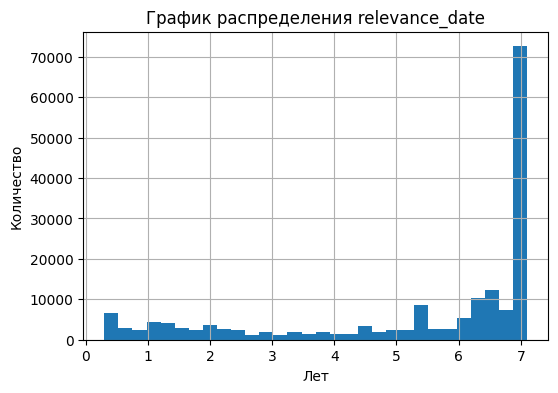

In [204]:
df_teachers_info.relevance_date.hist(figsize=(6,4), bins=30)

plt.title('График распределения relevance_date')
plt.ylabel('Количество')
plt.xlabel('Лет')
plt.show()

##### is_display_at_partners

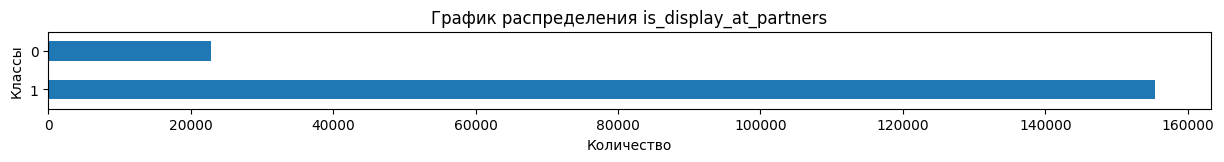

Распределение признака по классам в процентах


1    87.169896
0    12.830104
Name: is_display_at_partners, dtype: float64

In [205]:
df_teachers_info.is_display_at_partners.value_counts().plot.barh(figsize=(15, 1))
plt.title('График распределения is_display_at_partners')
plt.ylabel('Классы')
plt.xlabel('Количество')
plt.show()

print('Распределение признака по классам в процентах')
df_teachers_info['is_display_at_partners'].value_counts(normalize=True)*100

In [206]:
df_teachers_info.head(3)

,id,date_update,reg_date,birth_date,teaching_start_date,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,status_id,status_display,information,photo_path,is_display,rating_id,rating,rules_confirmed_date,last_visited,effective_rating,area_id,sex,is_remote_lessons,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,is_edited,orders_allowed,display_days,verification_status_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,is_display_at_partners
0,33,93,16.1,40.7,34.5,45,0,0,0,60,1000,4,0,1,1,1,15,5,8.0,1.3,1,1,1,1,0,1,0,1138.0,237.5,1,0,492.0,1,4.500000,1138.0,1,1.7,0
1,46,385,16.1,44.0,20.5,63,0,1,1,60,500,5,1,0,1,0,4,-3,9.5,-1.0,0,1,3,0,0,1,1,25.0,0.0,1,1,0.0,1,4.300781,25.0,0,7.1,1
2,51,259,16.1,58.8,35.5,68,0,0,0,60,1500,5,1,1,1,0,16,6,7.8,1.4,1,1,2,1,0,1,0,300.0,0.0,1,1,2182.0,3,4.300781,300.0,0,7.1,0


In [207]:
df_teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178315 entries, 0 to 307738
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          178315 non-null  int32  
 1   date_update                 178315 non-null  int64  
 2   reg_date                    178315 non-null  float64
 3   birth_date                  178315 non-null  float64
 4   teaching_start_date         178315 non-null  float64
 5   user_id                     178315 non-null  int32  
 6   is_email_confirmed          178315 non-null  int8   
 7   is_home_lessons             178315 non-null  int8   
 8   is_external_lessons         178315 non-null  int8   
 9   lesson_duration             178315 non-null  int16  
 10  lesson_cost                 178315 non-null  int32  
 11  status_id                   178315 non-null  int8   
 12  status_display              178315 non-null  int8   
 13  information   

##### Вывод по итогу исследования данных в таблице teachers_info

- Обработал пропуски
- Изучил распределения данных

Удаление некоторых преподавателей приведёт к частичной потере целевого признаказ, однако, это были выбивающиеся значения.

##### Резервный файл teachers_info

In [208]:
# df_teachers_info.to_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_clear.csv', index=False)

In [209]:
df_teachers_info_clear = df_teachers_info.copy()

In [210]:
# df_teachers_info_clear = pd.read_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_clear.csv')

In [211]:
del df_teachers_info

##### Обработка бинарных столбцов

In [212]:
binar_cols = ['is_email_confirmed', 'is_home_lessons', 'is_external_lessons',
              'status_display', 'is_display', 'effective_rating', 'is_remote_lessons',
              'show_on_map', 'send_mailing', 'send_suitable_orders', 'is_edited',
              'orders_allowed', 'is_display_at_partners']

In [213]:
%%time
df_teachers_info_clear['binar_teachers_info'] = df_teachers_info_clear.apply(binar_total, axis=1)

CPU times: user 50.7 s, sys: 216 ms, total: 50.9 s
Wall time: 50.7 s


In [214]:
df_teachers_info_clear = df_teachers_info_clear.drop(binar_cols, axis=1)

##### Обработка текстовых бинарных столбцов

In [215]:
binar_cols = ['information', 'photo_path']

In [216]:
%%time
df_teachers_info_clear['binar_teachers_info_text'] = df_teachers_info_clear.apply(binar_total, axis=1)

CPU times: user 48.9 s, sys: 1.1 s, total: 50 s
Wall time: 48.6 s


In [217]:
df_teachers_info_clear = df_teachers_info_clear.drop(binar_cols, axis=1)

##### Резервный файл teachers_info

In [218]:
# df_teachers_info_clear.to_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_final.csv', index=False)

In [219]:
df_teachers_info_final = df_teachers_info_clear.copy()

In [220]:
# df_teachers_info_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_final.csv')

In [221]:
del df_teachers_info_clear

## Подготовка итоговой таблицы

In [222]:
# df_teachers_info_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_final.csv')

In [223]:
# df_orders_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_orders_final.csv')

### Объединение таблиц

In [224]:
display(df_orders_final.head(3))
df_teachers_info_final.head(3)

,id,subject_id,lesson_price,lesson_duration,working_teacher_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,original_order_id,client_id,count_target_fix,target_fix,binar_total
2,2294056,21.0,800,60,143480,7.0,14.0,2.0,2,4.0,23,0,1024439,2.0,0.0,0
3,2294057,8.0,700,60,236392,10.0,10.0,3.0,2,4.0,14,2293804,1024340,3.0,0.0,3
11,2294065,5.0,900,60,27203,7.0,14.0,3.0,0,4.0,16,2293937,806382,7.0,0.0,0


,id,date_update,reg_date,birth_date,teaching_start_date,user_id,lesson_duration,lesson_cost,status_id,rating_id,rating,rules_confirmed_date,last_visited,area_id,sex,rating_for_users,rating_for_admin,display_days,verification_status_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,binar_teachers_info,binar_teachers_info_text
0,33,93,16.1,40.7,34.5,45,60,1000,4,15,5,8.0,1.3,1,1,1138.0,237.5,492.0,1,4.500000,1138.0,1,1.7,5,2
1,46,385,16.1,44.0,20.5,63,60,500,5,4,-3,9.5,-1.0,1,3,25.0,0.0,0.0,1,4.300781,25.0,0,7.1,8,1
2,51,259,16.1,58.8,35.5,68,60,1500,5,16,6,7.8,1.4,1,2,300.0,0.0,2182.0,3,4.300781,300.0,0,7.1,6,2


In [225]:
df_orders_final = df_orders_final.merge(df_teachers_info_final,
                                        left_on='working_teacher_id', right_on='id',
                                        how='left')

In [226]:
df_orders_final = df_orders_final.dropna()

In [227]:
cols = ['subject_id', 'lesson_price', 'lesson_duration_x',
        'planned_lesson_number', 'pupil_category_new_id', 'lessons_per_week',
        'teacher_sex', 'lesson_place_new', 'source_id', 'count_target_fix',
        'binar_total', 'date_update', 'reg_date', 'birth_date',
        'teaching_start_date', 'lesson_duration_y', 'lesson_cost', 'status_id',
        'rating_id', 'rating', 'rules_confirmed_date', 'last_visited',
        'area_id', 'sex', 'rating_for_users', 'rating_for_admin',
        'display_days', 'verification_status_id', 'star_rating',
        'rating_for_users_yesterday', 'review_num', 'relevance_date',
        'binar_teachers_info', 'binar_teachers_info_text', 'target_fix']
df_orders_final = df_orders_final[cols]

In [228]:
display(df_orders_final.head())
df_orders_final.info()

,subject_id,lesson_price,lesson_duration_x,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,count_target_fix,binar_total,date_update,reg_date,birth_date,teaching_start_date,lesson_duration_y,lesson_cost,status_id,rating_id,rating,rules_confirmed_date,last_visited,area_id,sex,rating_for_users,rating_for_admin,display_days,verification_status_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,binar_teachers_info,binar_teachers_info_text,target_fix
0,21.0,800,60,7.0,14.0,2.0,2,4.0,23,2.0,0,100.0,5.7,78.7,35.5,60.0,670.0,5.0,16.0,6.0,5.7,1.3,2.0,2.0,1037.0,283.250,1964.0,3.0,4.898438,1107.0,1.0,1.1,9.0,2.0,0.0
1,8.0,700,60,10.0,10.0,3.0,2,4.0,14,3.0,3,100.0,2.5,33.7,15.4,45.0,1000.0,5.0,23.0,10.0,2.5,1.3,3.0,2.0,450.0,0.000,830.5,3.0,4.300781,500.0,0.0,2.5,8.0,2.0,0.0
2,5.0,900,60,7.0,14.0,3.0,0,4.0,16,7.0,0,93.0,12.6,34.0,13.4,90.0,1500.0,5.0,15.0,5.0,9.2,1.3,1.0,2.0,556.0,66.125,3590.0,1.0,4.898438,556.0,1.0,3.9,12.0,2.0,0.0
3,5.0,900,60,7.0,14.0,3.0,0,4.0,16,7.0,0,93.0,12.6,34.0,13.4,90.0,1500.0,5.0,15.0,5.0,9.2,1.3,1.0,2.0,556.0,66.125,3590.0,1.0,4.898438,556.0,1.0,3.9,12.0,2.0,0.0
4,5.0,900,60,7.0,14.0,3.0,0,4.0,16,7.0,0,93.0,12.6,34.0,13.4,90.0,1500.0,5.0,15.0,5.0,9.2,1.3,1.0,2.0,556.0,66.125,3590.0,1.0,4.898438,556.0,1.0,3.9,12.0,2.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 728198 entries, 0 to 868126
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   subject_id                  728198 non-null  float32
 1   lesson_price                728198 non-null  int64  
 2   lesson_duration_x           728198 non-null  int64  
 3   planned_lesson_number       728198 non-null  float64
 4   pupil_category_new_id       728198 non-null  float64
 5   lessons_per_week            728198 non-null  float64
 6   teacher_sex                 728198 non-null  int64  
 7   lesson_place_new            728198 non-null  float64
 8   source_id                   728198 non-null  int32  
 9   count_target_fix            728198 non-null  float64
 10  binar_total                 728198 non-null  int64  
 11  date_update                 728198 non-null  float64
 12  reg_date                    728198 non-null  float64
 13  birth_date    

### Очистка данных

In [229]:
# df_orders_final = df_orders_final.drop(['id_x', 'working_teacher_id', 'original_order_id',
#                                         'client_id', 'additional_status_id', 'id_y', 'user_id'], axis=1)

In [230]:
df_orders_final = df_orders_final.loc[df_orders_final.count_target_fix <= 10]

In [231]:
df_orders_final.head(3)

,subject_id,lesson_price,lesson_duration_x,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,count_target_fix,binar_total,date_update,reg_date,birth_date,teaching_start_date,lesson_duration_y,lesson_cost,status_id,rating_id,rating,rules_confirmed_date,last_visited,area_id,sex,rating_for_users,rating_for_admin,display_days,verification_status_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,binar_teachers_info,binar_teachers_info_text,target_fix
0,21.0,800,60,7.0,14.0,2.0,2,4.0,23,2.0,0,100.0,5.7,78.7,35.5,60.0,670.0,5.0,16.0,6.0,5.7,1.3,2.0,2.0,1037.0,283.250,1964.0,3.0,4.898438,1107.0,1.0,1.1,9.0,2.0,0.0
1,8.0,700,60,10.0,10.0,3.0,2,4.0,14,3.0,3,100.0,2.5,33.7,15.4,45.0,1000.0,5.0,23.0,10.0,2.5,1.3,3.0,2.0,450.0,0.000,830.5,3.0,4.300781,500.0,0.0,2.5,8.0,2.0,0.0
2,5.0,900,60,7.0,14.0,3.0,0,4.0,16,7.0,0,93.0,12.6,34.0,13.4,90.0,1500.0,5.0,15.0,5.0,9.2,1.3,1.0,2.0,556.0,66.125,3590.0,1.0,4.898438,556.0,1.0,3.9,12.0,2.0,0.0


In [232]:
print(f"Количество явных дубликатов: {df_orders_final.duplicated().sum()}\n")

Количество явных дубликатов: 37748



In [233]:
df_orders_final = df_orders_final.drop_duplicates()

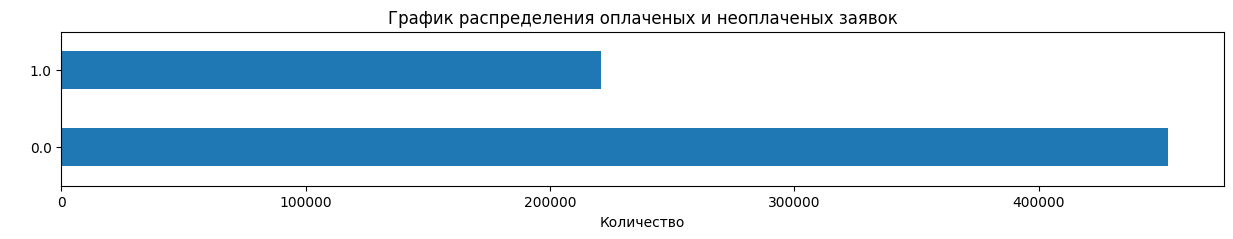

Распределение целевого признака по классам в процентах


0.0    67.234306
1.0    32.765694
Name: target_fix, dtype: float64

In [234]:
df_orders_final.target_fix.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения оплаченых и неоплаченых заявок')
plt.ylabel(' ')
plt.xlabel('Количество')
plt.show()

print('Распределение целевого признака по классам в процентах')
df_orders_final['target_fix'].value_counts(normalize=True)*100

## Проверка на мультиколлинеарность

In [235]:
INTERVAL_COLS = ['lesson_price', 'date_update', 'reg_date', 'birth_date',
                 'teaching_start_date', 'lesson_cost', 'rules_confirmed_date', 'last_visited',
                 'rating_for_users', 'rating_for_admin', 'display_days', 'rating_for_users_yesterday']
corr_table = df_orders_final.phik_matrix(interval_cols=INTERVAL_COLS)


In [236]:
(corr_table.loc[corr_table['target_fix']>0.1]).index

Index(['pupil_category_new_id', 'lesson_place_new', 'source_id', 'binar_total',
       'rating_for_users', 'rating_for_admin', 'star_rating',
       'rating_for_users_yesterday', 'review_num', 'target_fix'],
      dtype='object')

Оценим корреляцию между признаками и выберем наиболее подходящие для обучения моделей.

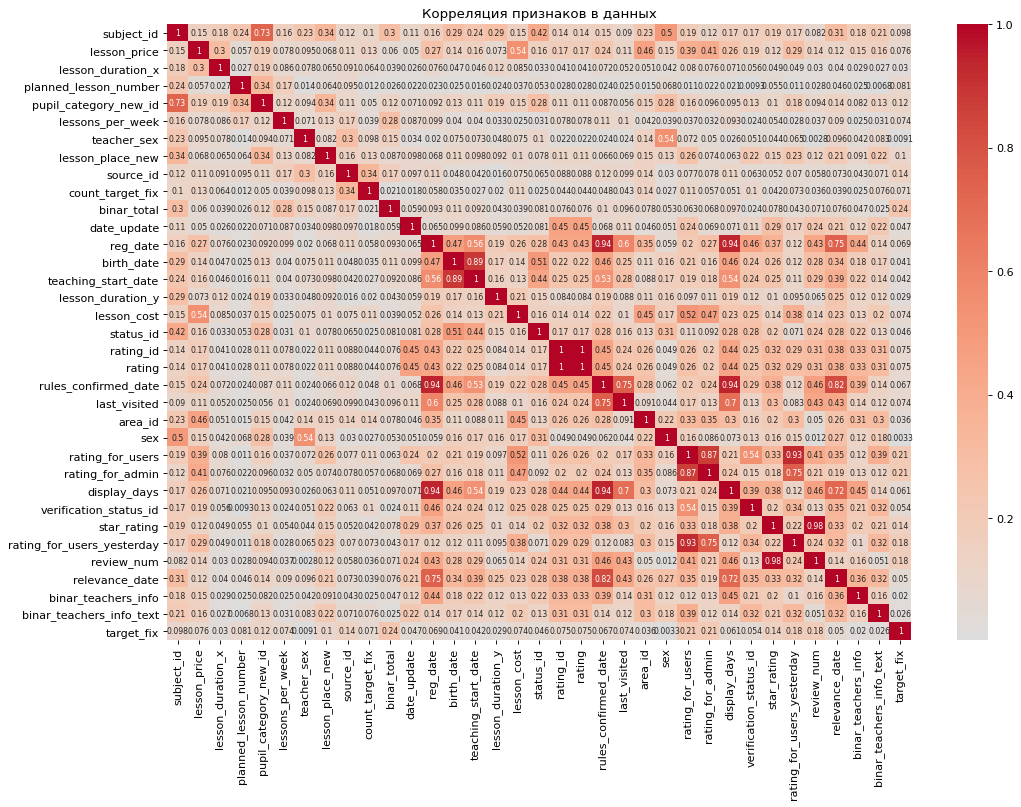

In [237]:
figure(figsize=(15, 10), dpi=80)
sns.heatmap(corr_table, annot=True, annot_kws={"size": 7}, cmap='coolwarm', center=0)
plt.title('Корреляция признаков в данных')
plt.show()

In [282]:
# final_cols = ['subject_id', 'lesson_price', 'lesson_duration', # 0.7
#        'planned_lesson_number', 'pupil_category_new_id', 'lessons_per_week',
#        'teacher_sex', 'lesson_place_new', 'source_id', 'count_target_fix',
#        'target_fix', 'binar_total']

final_cols = ['subject_id', 'pupil_category_new_id', 'lesson_place_new', 'source_id',
       'count_target_fix', 'binar_total', 'rating_for_users',
       'rating_for_admin', 'review_num', 'target_fix']

df_final = df_orders_final[final_cols]

In [239]:
corr_table_final = df_final.phik_matrix(interval_cols=INTERVAL_COLS)

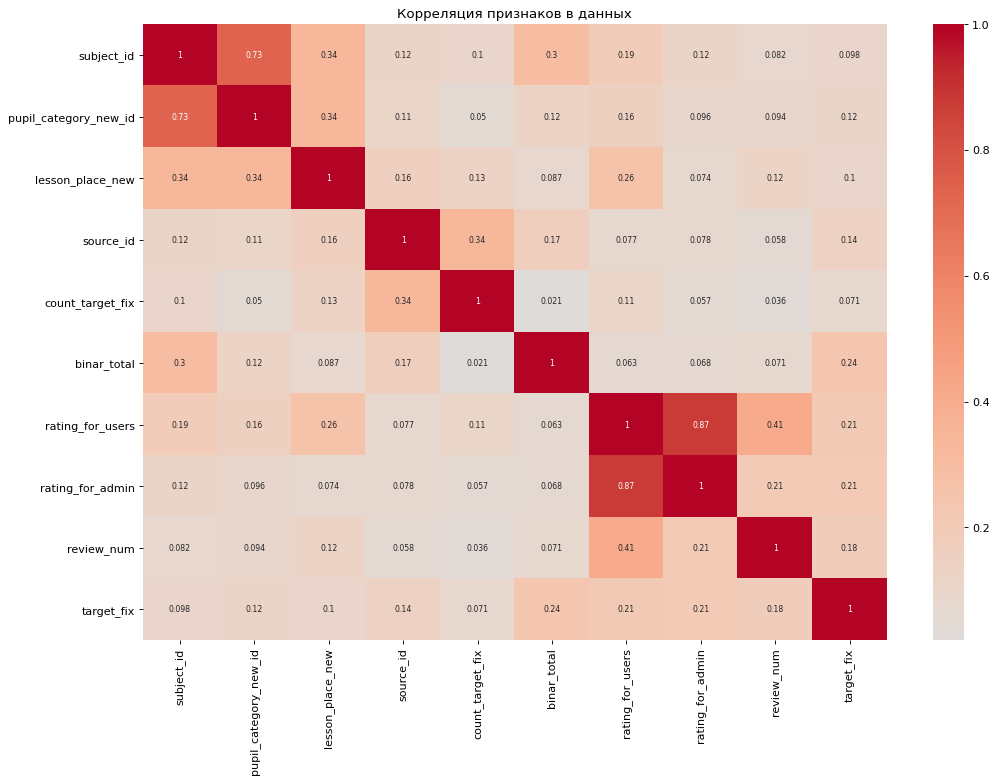

In [240]:
figure(figsize=(15, 10), dpi=80)
sns.heatmap(corr_table_final, annot=True, annot_kws={"size": 7}, cmap='coolwarm', center=0)
plt.title('Корреляция признаков в данных')
plt.show()

In [241]:
# df_orders_final.columns

In [242]:
# final_cols = ['subject_id',
#        'amount_to_pay', 'pupil_category_new_id',
#        'lesson_place_new', 'source_id',
#        'additional_status_id', 'count_target_fix',
#        'target_fix']

# df_final = df_orders_final[final_cols]
df_final.head(2)

,subject_id,pupil_category_new_id,lesson_place_new,source_id,count_target_fix,binar_total,rating_for_users,rating_for_admin,review_num,target_fix
0,21.0,14.0,4.0,23,2.0,0,1037.0,283.25,1.0,0.0
1,8.0,10.0,4.0,14,3.0,3,450.0,0.00,0.0,0.0


## Подготовка данных для обучения

### Разбиение данных

In [283]:
RANDOM_STATE = 42

In [284]:
X = df_final.drop('target_fix', axis=1)
y = df_final['target_fix']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=RANDOM_STATE,
                                                    shuffle=True)

In [286]:
train_sample = X_train.shape[0]/X.shape[0]
test_sample = X_test.shape[0]/X.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(train_sample))
print('Размер тестовой выборки - {:.0%}'.format(test_sample))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


In [287]:
display(X_train.shape)
display(X_test.shape)

(505470, 9)

(168491, 9)

### Масштабирование и кодирование признаков

Для масштабирования признаков будем использовать ColumnTransformer

<!-- а для упрощения извлечения важностей признаков из моделей поставим `set_output(transform="pandas")` -->

In [288]:
numerics = list(X.select_dtypes(include=['int', 'float']).columns)
categorical = list(X.select_dtypes(include='object').columns)

In [289]:
# Удаление предупреждения
pd.options.mode.chained_assignment = None

# Создадим объект структуры и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(X_train[numerics])

# Преобразуем обучающую, валидационную и тестовую выборки функцией transform()
X_train[numerics] = scaler.transform(X_train[numerics])
X_test[numerics] = scaler.transform(X_test[numerics])

In [290]:
X_train.head(2)

,subject_id,pupil_category_new_id,lesson_place_new,source_id,count_target_fix,binar_total,rating_for_users,rating_for_admin,review_num
297840,3.0,1.102986,0.361751,14,0.083226,0.079566,1292.0,646.0,0.343817
157273,13.0,0.549033,0.361751,14,1.265599,0.079566,2390.0,870.5,0.343817


In [291]:
display(X_train.shape)
display(X_test.shape)

(505470, 9)

(168491, 9)

### Вывод по итогу подготовки данных для обучения

Проведены:

- разбиение данных на выборки в соотношении train/test = 3/1
- масштабирование признаков`


## Обучение и выбор модели

In [292]:
result = []

### CatBoost

In [293]:
cbc = CatBoostClassifier(loss_function='Logloss')

In [294]:
cbc.get_params().keys()

dict_keys(['loss_function'])

In [295]:
%%time

# Выберем параметры для grid search
cbc_parametrs = {'depth'         : [10],
                 'learning_rate' : [0.01],
                 'iterations'    : [1000],
                 'l2_leaf_reg'   : [5]
}

# Настраиваем grid search
cbc_gs = GridSearchCV(cbc, cbc_parametrs, n_jobs=-1, cv=5, scoring='roc_auc', refit = 'roc_auc')

# Запускаем обучение X_train
cbc_gs.fit(X_train, y_train, logging_level='Silent')


# cbc_parametrs = {
#                  'depth'         : [4, 6, 10, 14],
#                  'learning_rate' : [0.001, 0.01, 0.1, 1.0],
#                  'iterations'    : [50, 80, 100, 200, 500. 1000]
#                  'l2_leaf_reg'   : [5]
# }

CPU times: user 5min 14s, sys: 18.6 s, total: 5min 32s
Wall time: 6min 43s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f478544a6a0>,
             n_jobs=-1,
             param_grid={'depth': [10], 'iterations': [1000],
                         'l2_leaf_reg': [5], 'learning_rate': [0.01]},
             refit='roc_auc', scoring='roc_auc')

In [296]:
# Создадим dataframe из cross-validation данных
cbc_cv_scores = pd.DataFrame(cbc_gs.cv_results_).sort_values(by='rank_test_score')
result.append(['CatBoost', cbc_gs.best_score_])

# Отобразим полученные результаты
display(cbc_gs.best_params_)
print(f"Оценка на кросс-валидации для лучшего экземпляра модели CatBoost: {cbc_gs.best_score_}")
cbc_cv_scores[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head(3)

{'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.01}

Оценка на кросс-валидации для лучшего экземпляра модели CatBoost: 0.7520670825034719


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'depth': 10, 'iterations': 1000, 'l2_leaf_reg...",0.750465,0.753239,0.752219,0.752398,0.752014,0.752067,0.000903,1


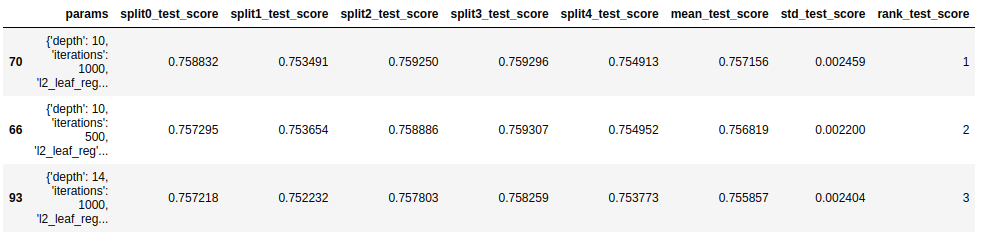

### Вывод по итогу обучения моделей

In [297]:
pd.DataFrame(result, columns=['Модель', 'ROC-AUC']).sort_values(by='ROC-AUC', ascending=False)

,Модель,ROC-AUC
0,CatBoost,0.752067


Лучшие результаты на кросс-валидации показала модель CatBoost с гиперпараметрами:

`'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1`

В дальнейшем будем использовать её.

## Оценка лучшей модели

### Тестирование модели

In [298]:
cbc_y_preds = cbc_gs.predict_proba(X_test)[:, 1]

cbc_roc_auc = roc_auc_score(y_test, cbc_y_preds)
# zero_roc_auc = roc_auc_score(y_test, y_test*0)

print(f"Метрика roc_auc модели `CatBoost` равна: {cbc_roc_auc}")
# print(f"Метрика roc_auc качества предсказания столбца нулей равна: {zero_roc_auc}")
print()
report = classification_report(y_test, cbc_gs.predict(X_test))
print(report)

Метрика roc_auc модели `CatBoost` равна: 0.7548645145111363

              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81    113217
         1.0       0.64      0.34      0.45     55274

    accuracy                           0.72    168491
   macro avg       0.69      0.62      0.63    168491
weighted avg       0.71      0.72      0.69    168491



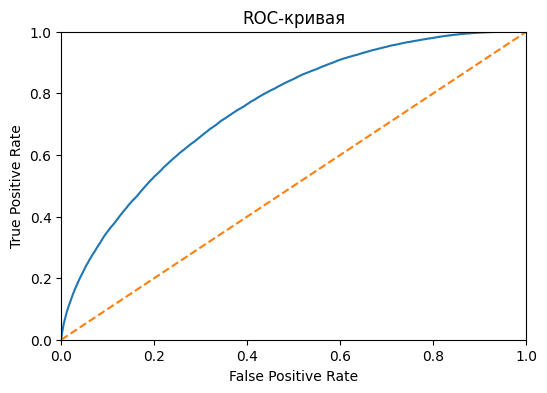

In [299]:
# ROC кривая
fpr, tpr, thresholds = roc_curve(y_test, cbc_y_preds)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

### Матрица ошибок

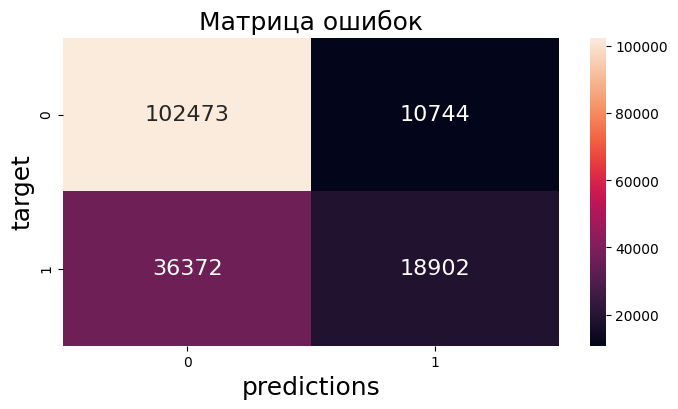

In [300]:
# Матрица ошибок
predictions = cbc_gs.predict(X_test)

cm_cbc = confusion_matrix(y_test, predictions)
cm_cbc_data = pd.DataFrame(cm_cbc,
                           index=['0', '1'],
                           columns=['0', '1'])

plt.figure(figsize=(8, 4))
sns.heatmap(cm_cbc, xticklabels=cm_cbc_data.columns, yticklabels=cm_cbc_data.index,
            annot=True, fmt='g', annot_kws={"size": 16})
plt.title("Матрица ошибок", size=18)
plt.xlabel('predictions', size=18)
plt.ylabel('target', size=18)
plt.show()

In [301]:
print(f"True  Positive :{cm_cbc[0][0]}/{cm_cbc[0][0]/len(y_test==0):.2%}"
      " – количество заказов, правильно отнесенных к 0 классу (не оплачено)")
print(f"False Positive :{cm_cbc[0][1]}/{cm_cbc[0][1]/len(y_test==1):.2%}"
      " – количество заказов, не правильно отнесенных к 0 классу")
print()

print(f"True  Negative :{cm_cbc[1][1]}/{cm_cbc[1][1]/len(y_test==1):.2%}"
      " – количество заказов, правильно отнесенных к 1 классу (оплачено)")
print(f"False Negative :{cm_cbc[1][0]}/{cm_cbc[1][0]/len(y_test==0):.2%}"
      " – количество заказов, не правильно отнесенных к 1 классу")

True  Positive :102473/60.82% – количество заказов, правильно отнесенных к 0 классу (не оплачено)
False Positive :10744/6.38% – количество заказов, не правильно отнесенных к 0 классу

True  Negative :18902/11.22% – количество заказов, правильно отнесенных к 1 классу (оплачено)
False Negative :36372/21.59% – количество заказов, не правильно отнесенных к 1 классу


### Оценка важности признаков

In [279]:
# Функция отображения важности признаков модели
def plot_feature_importance(feature_names, feature_scores, top_feats=20, title='Importance', x_label='Importance', 
                            y_label='Features'):
    tuples = [(name, round(score, 3)) for name, score in zip(feature_names, feature_scores)]
    tuples = sorted(tuples, key=lambda x: x[1])[-top_feats:]
    
    labels, values = zip(*tuples)
    _, ax = plt.subplots(1, 1, figsize=(10, 8))
    ylocs = np.arange(len(values))
    
    ax.barh(ylocs, values, align='center', height=0.4)
    for x, y in zip(values, ylocs):
        ax.text(x + 1, y, x, va='center')
        
    ax.set_yticks(ylocs)
    ax.set_yticklabels(labels)
    xlim = (0, max(values) * 1.1)
    ax.set_xlim(xlim)
    ylim = (-1, len(values))
    ax.set_ylim(ylim)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)

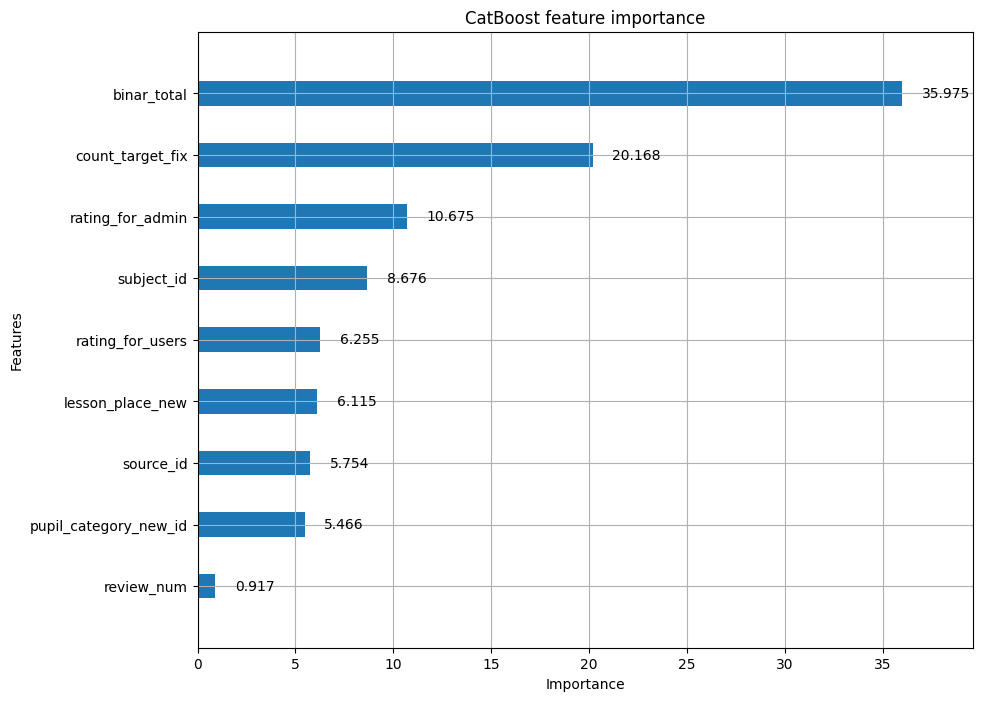

In [302]:
importances = cbc_gs.best_estimator_.feature_importances_
plot_feature_importance(X_train, importances, top_feats=X_train.shape[1], title='CatBoost feature importance', 
                        x_label='Importance')

## Итоговый вывод

Метрика roc_auc модели `CatBoost` равна: 0.75486

Модель считает наиболее важными признаком - общее количество дублей заявки, сумму бинарных признаков из таблицы заказов

###### Количество от общего объема заявок, которое мы можем не обрабатывать, так как они не будут оплачены:

- True  Positive - 60.82% – количество заказов, правильно отнесенных к 0 классу (не оплачено)

---

###### Топ заявок, которым нужно отдать максимальный приоритет:
- False Negative - 21.59% – количество заказов, не правильно отнесенных к 1 классу (потенциально могут быть оплачены)
---

###### Имеет значения precision, ко которым толерантен заказчик
- `0` - 0.74 (precision неоплаченных заявок)
- `1` - 0.64
---

### Возможные улучшения проекта

Дополнительное присоединение таблицы `suitable_teachers`. Однако, у меня не получилось извлечь из нее значительной выгоды при сохранении трудозатрат.

Другие вариации признаков итоговой модели

Использование ансамблей.